# Install PennyLane Library

In [ ]:
! pip install pennylane

# Load, Normalize and Display Dataset

Syndrome Images


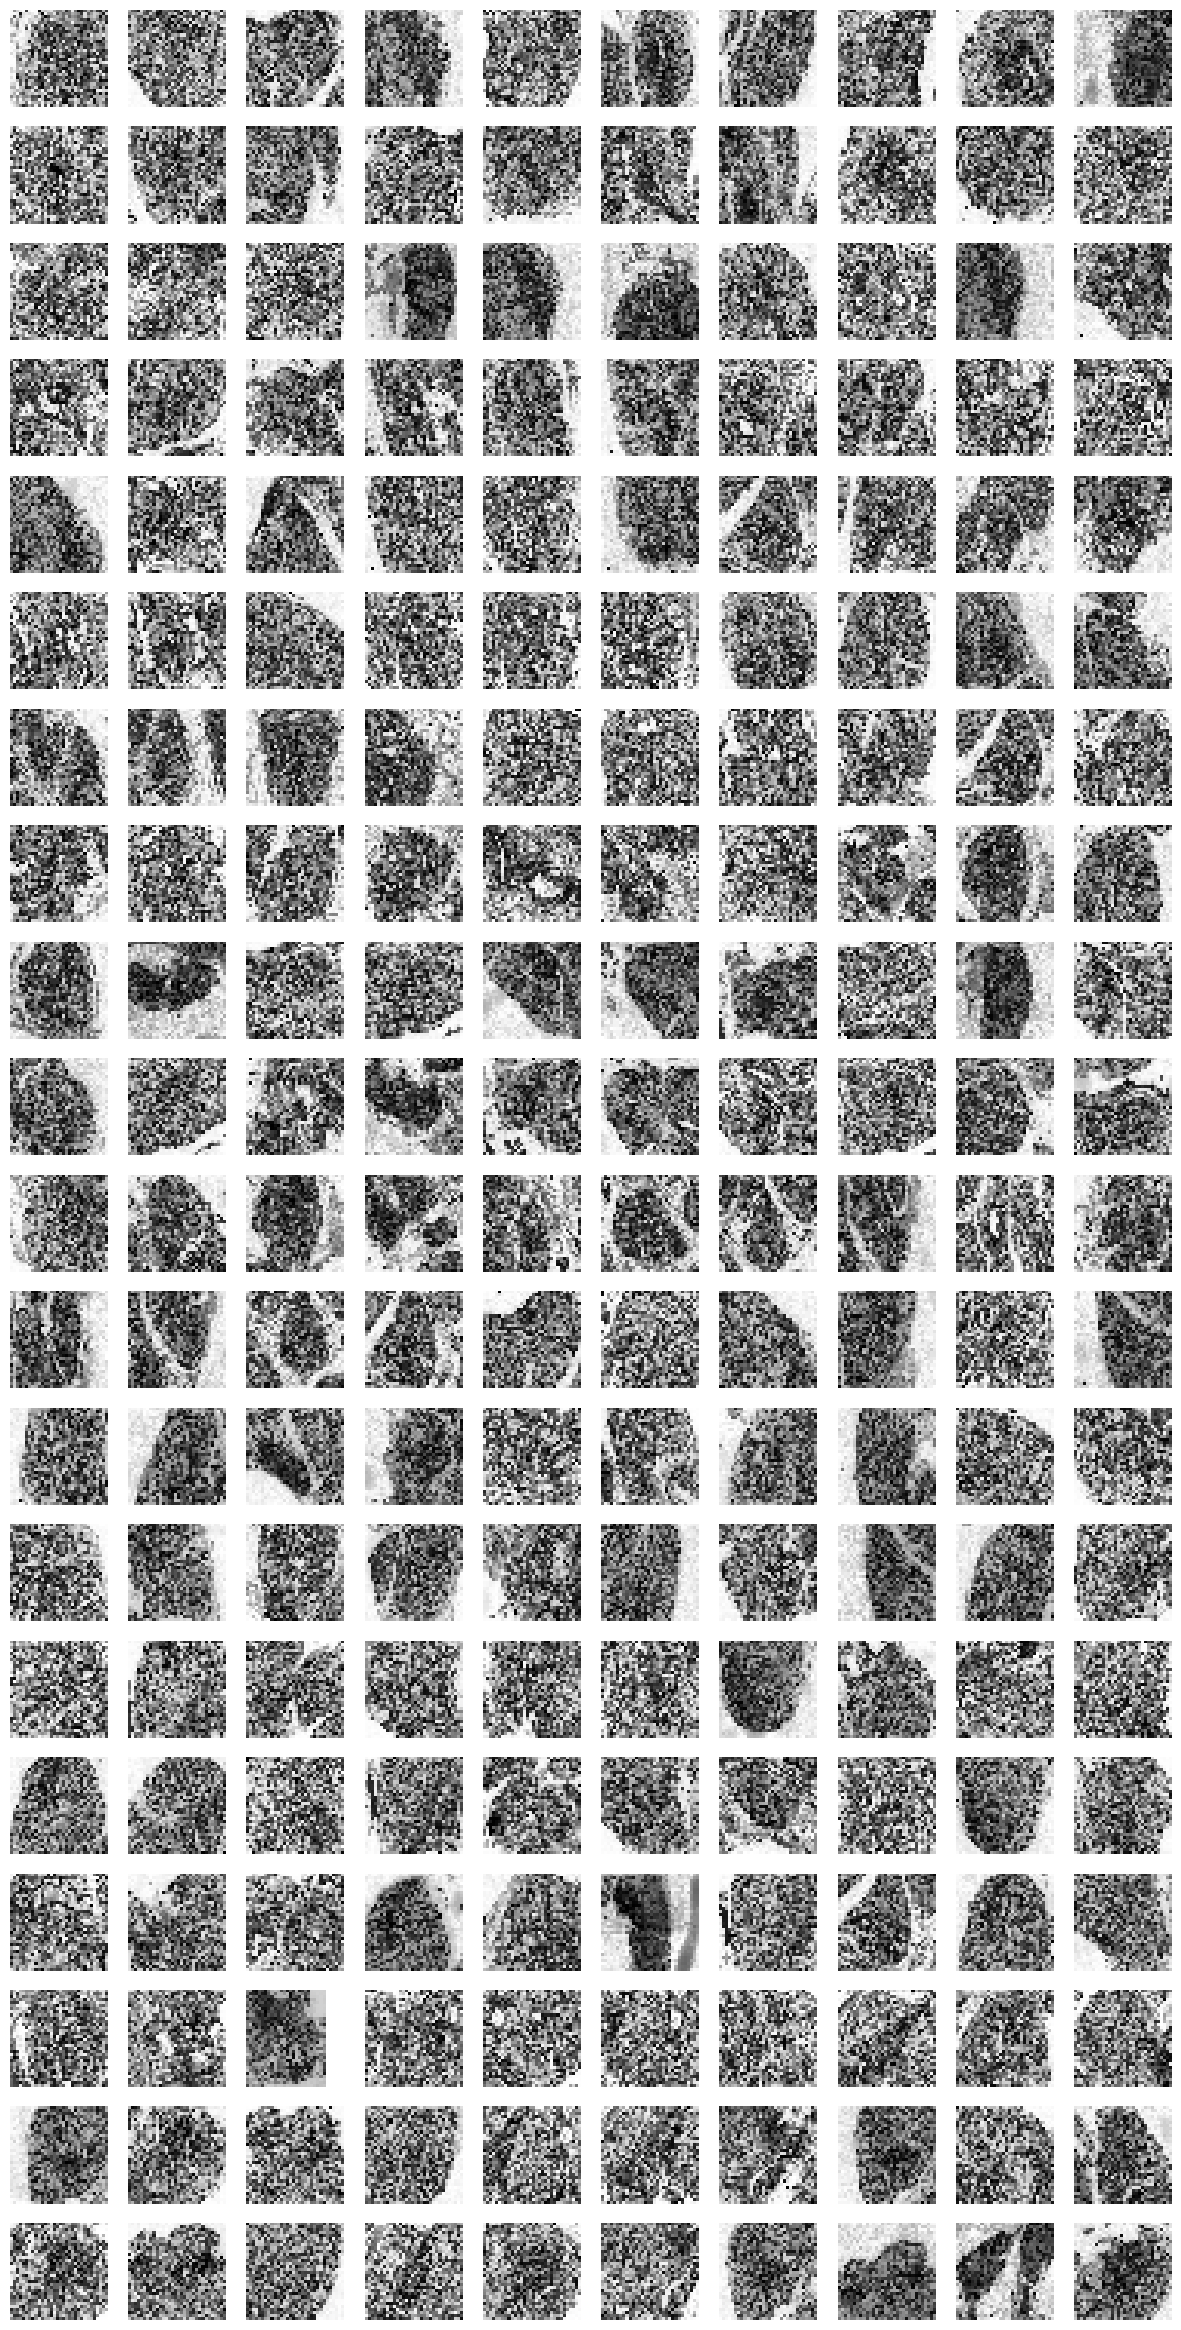

Non Syndrome Images


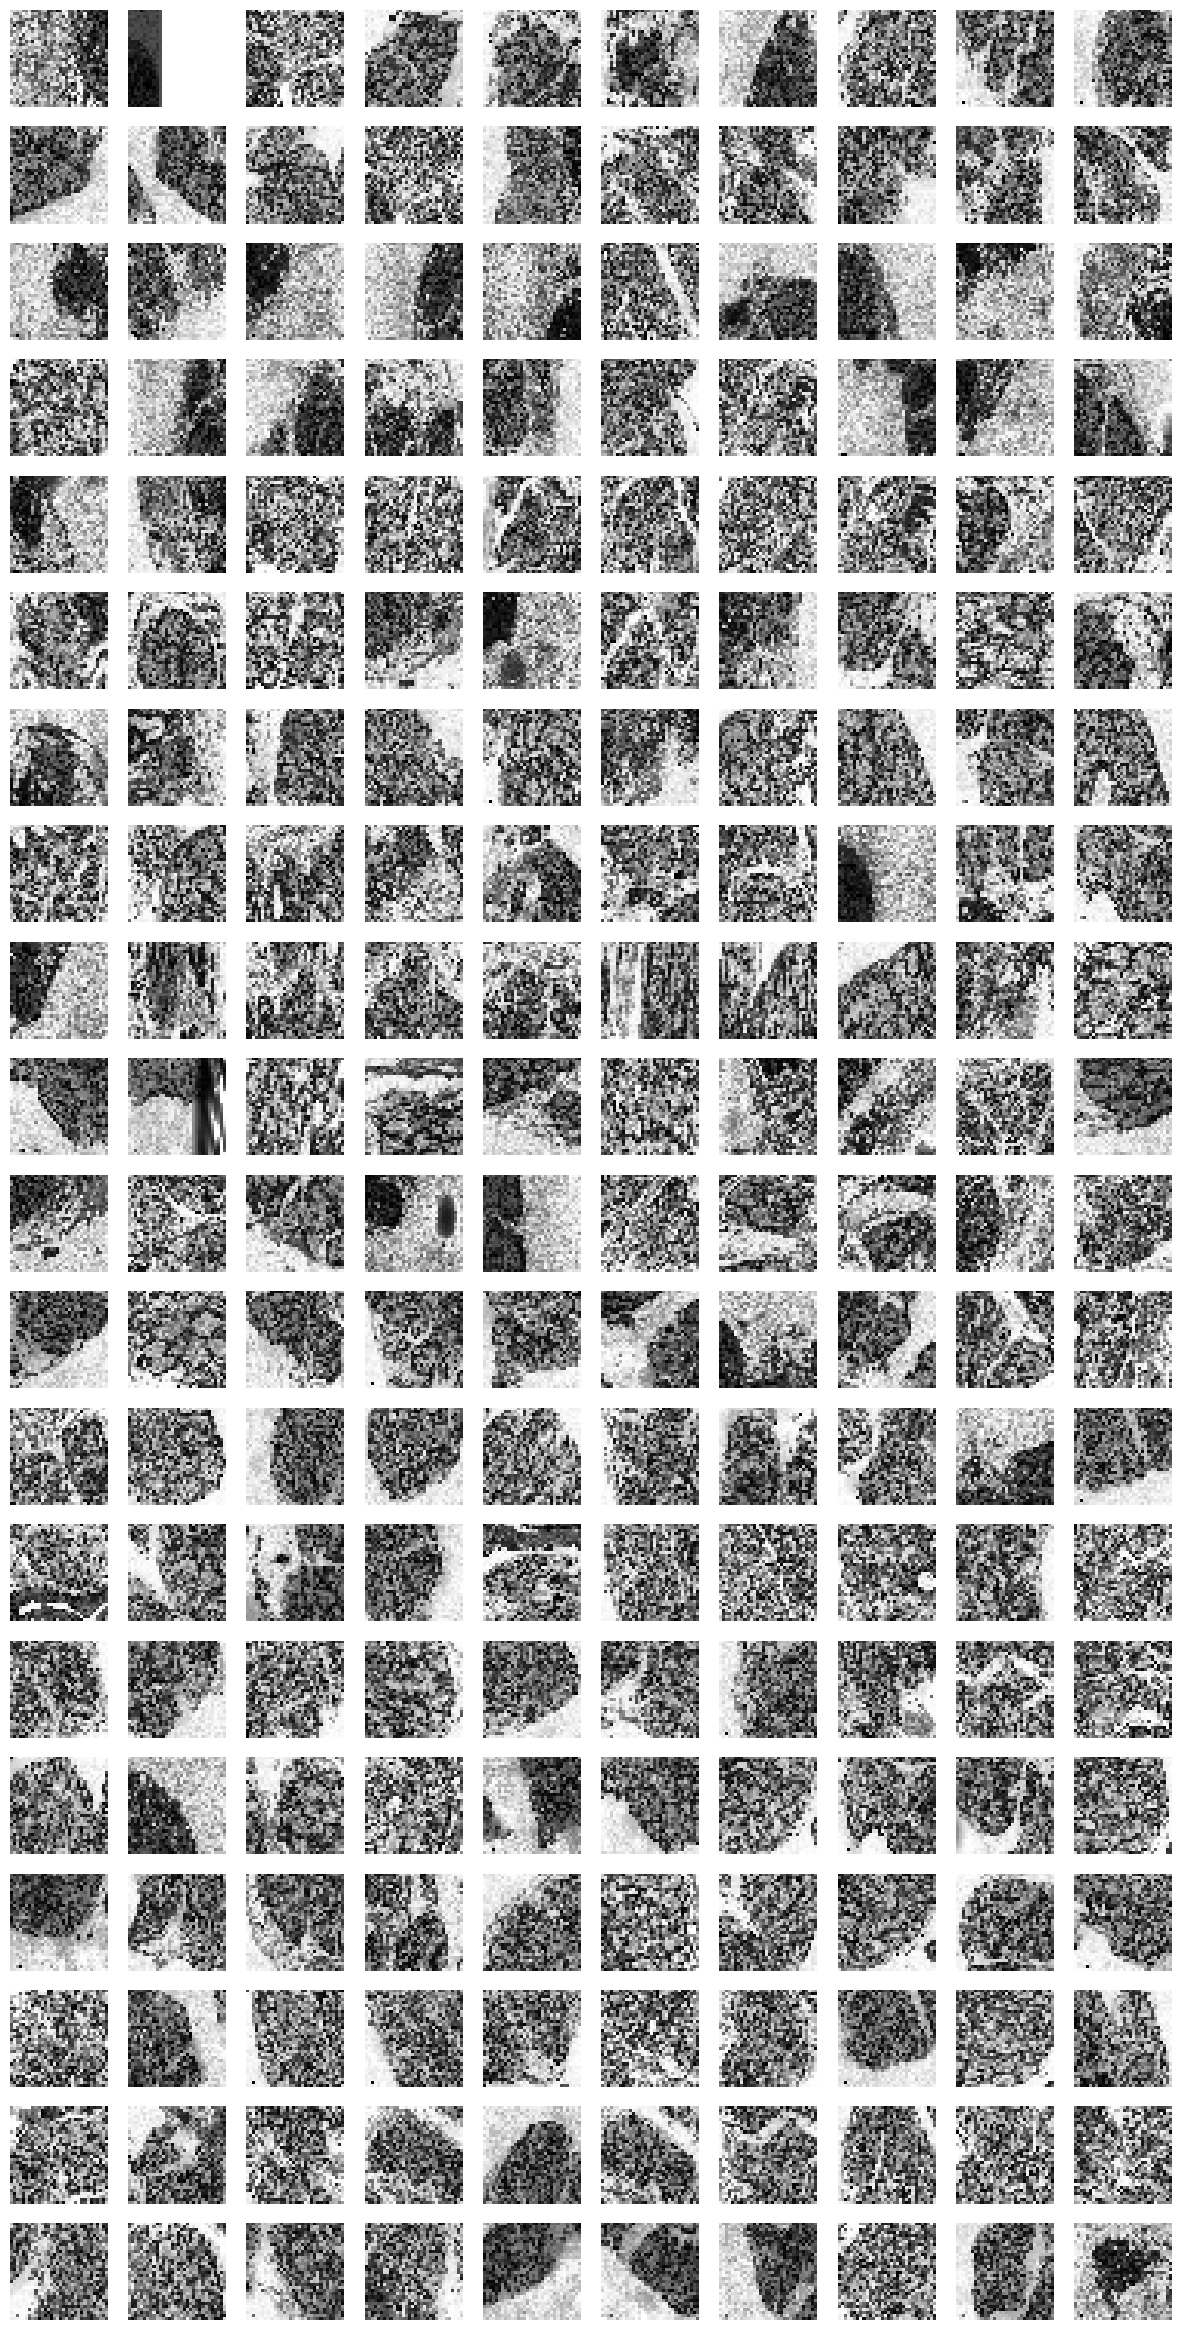

In [ ]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import cv2

def read_h5_images(h5_file):
    image_arrays = []
    with h5py.File(h5_file, 'r') as hf:
        keys = list(hf.keys())
        num_images = min(200, len(keys))

        for i in range(num_images):
            image_data = hf[keys[i]][()]
            image_arrays.append(image_data)

    return image_arrays

def display_images(image_arrays):
    num_images = len(image_arrays)
    num_rows = int(np.ceil(num_images / 10))
    fig, axes = plt.subplots(num_rows, 10, figsize=(15, num_rows * 1.5))

    for i in range(num_images):
        if num_rows > 1:
            ax = axes[i // 10, i % 10]
        else:
            ax = axes[i % 10]
        ax.imshow(image_arrays[i], cmap='gray')
        ax.axis('off')

    plt.show()

syndrome_images = read_h5_images('syndrome_data_200_32.h5')
non_syndrome_images = read_h5_images('non_syndrome_data_200_32.h5')

syndrome_images = np.array(syndrome_images) / 255
non_syndrome_images = np.array(non_syndrome_images) / 255

syndrome_labels = np.ones(len(syndrome_images))
non_syndrome_labels = np.zeros(len(non_syndrome_images))

print('Syndrome Images')
display_images(syndrome_images)
print('Non Syndrome Images')
display_images(non_syndrome_images)

# Load Downsampled Dataset (Experiment 1 Only)

To run the architectures with this dataset, you will ened to change the input/output size of some layers, including the quanvolutional one.

Syndrome Images


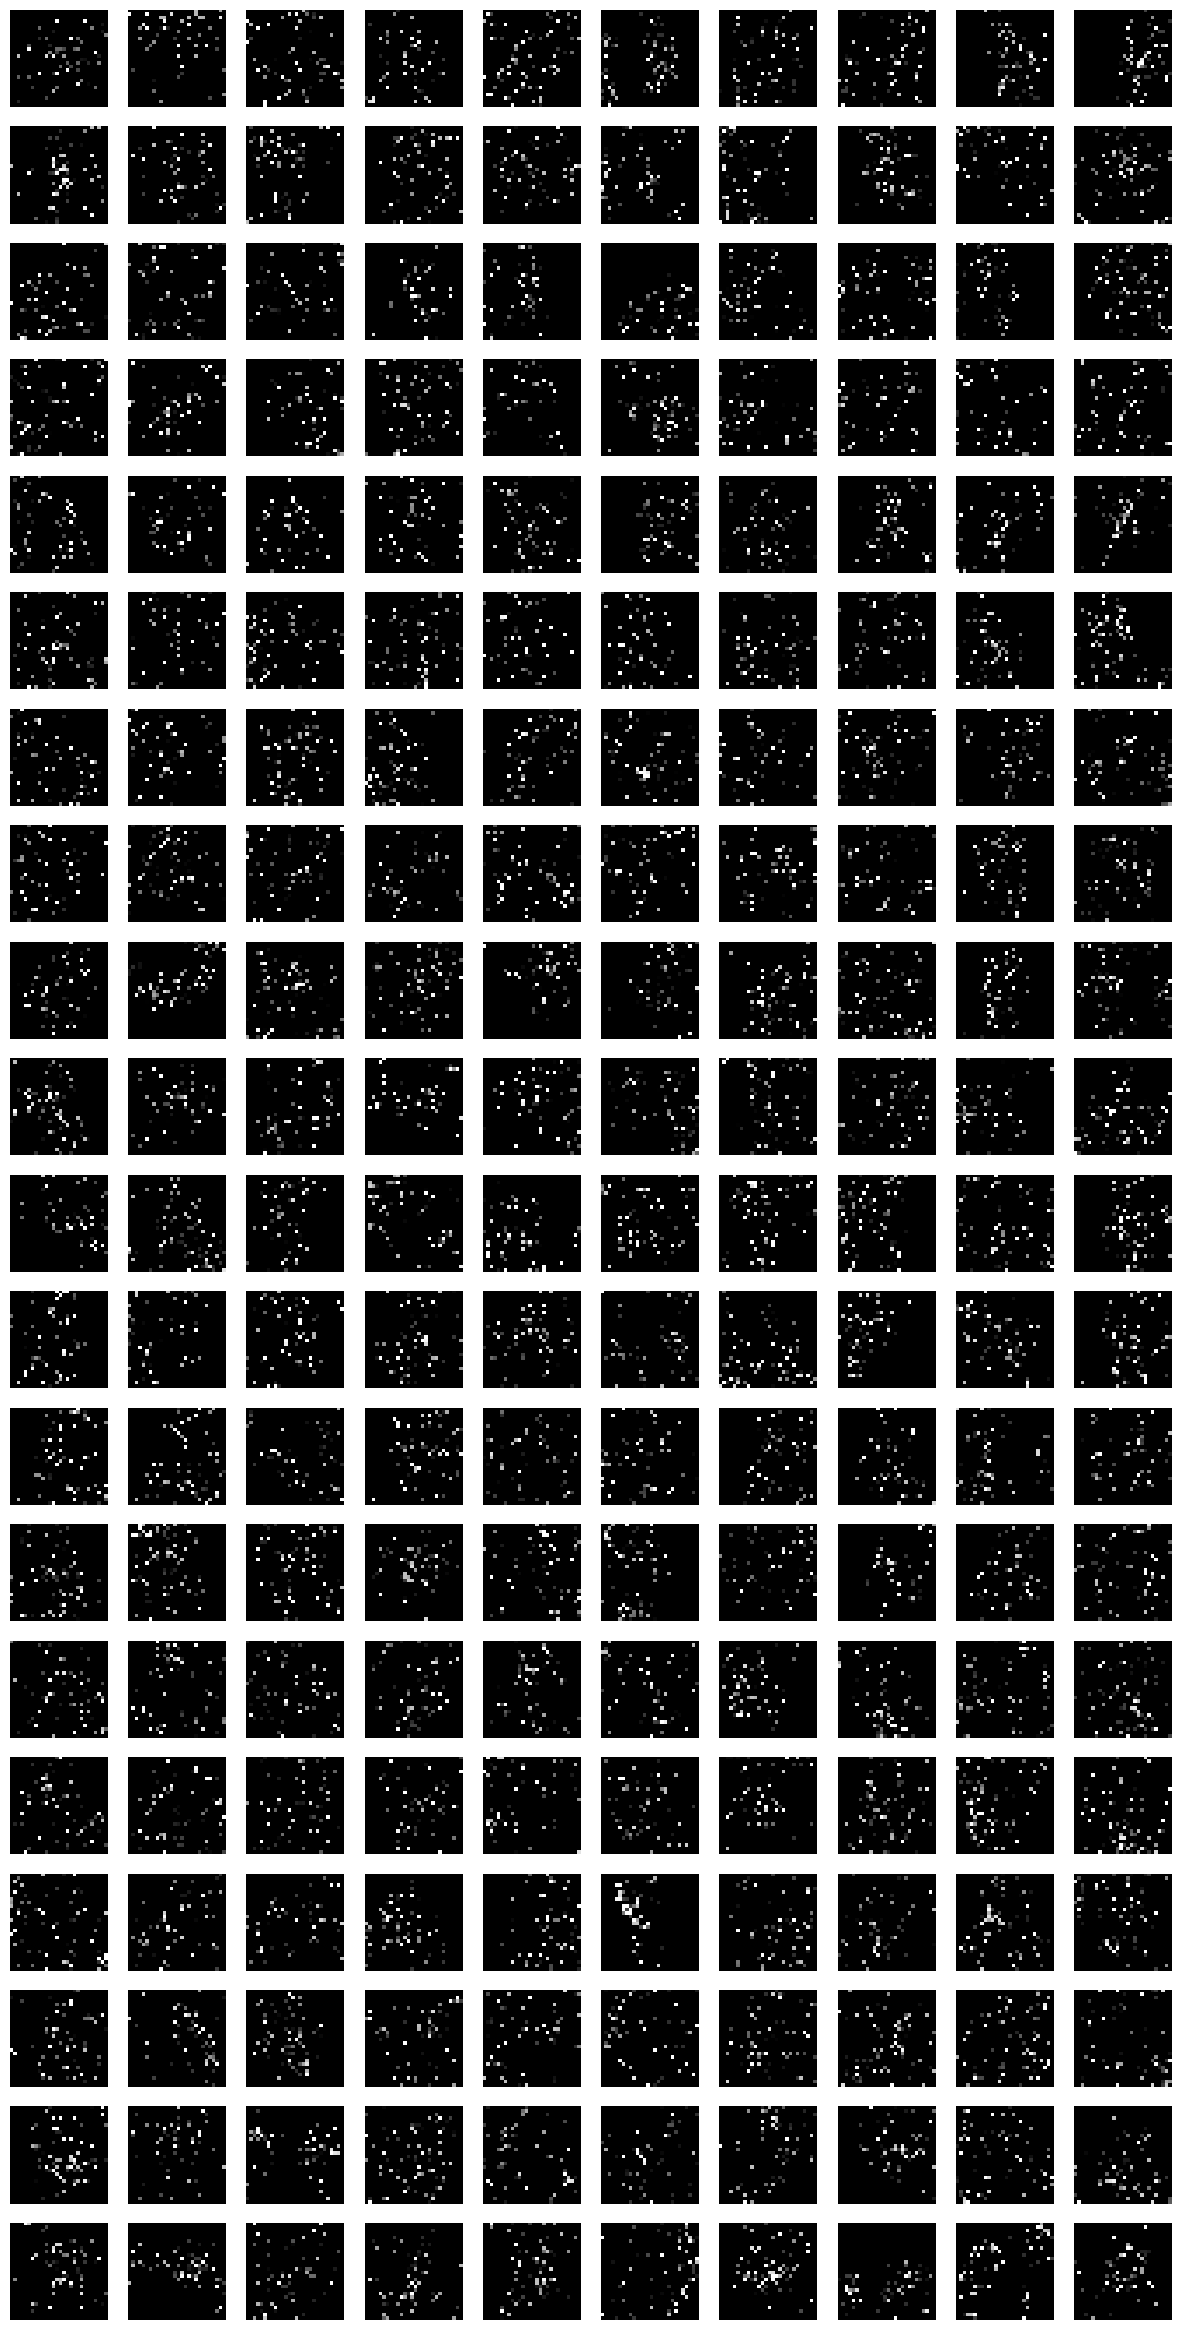

Non Syndrome Images


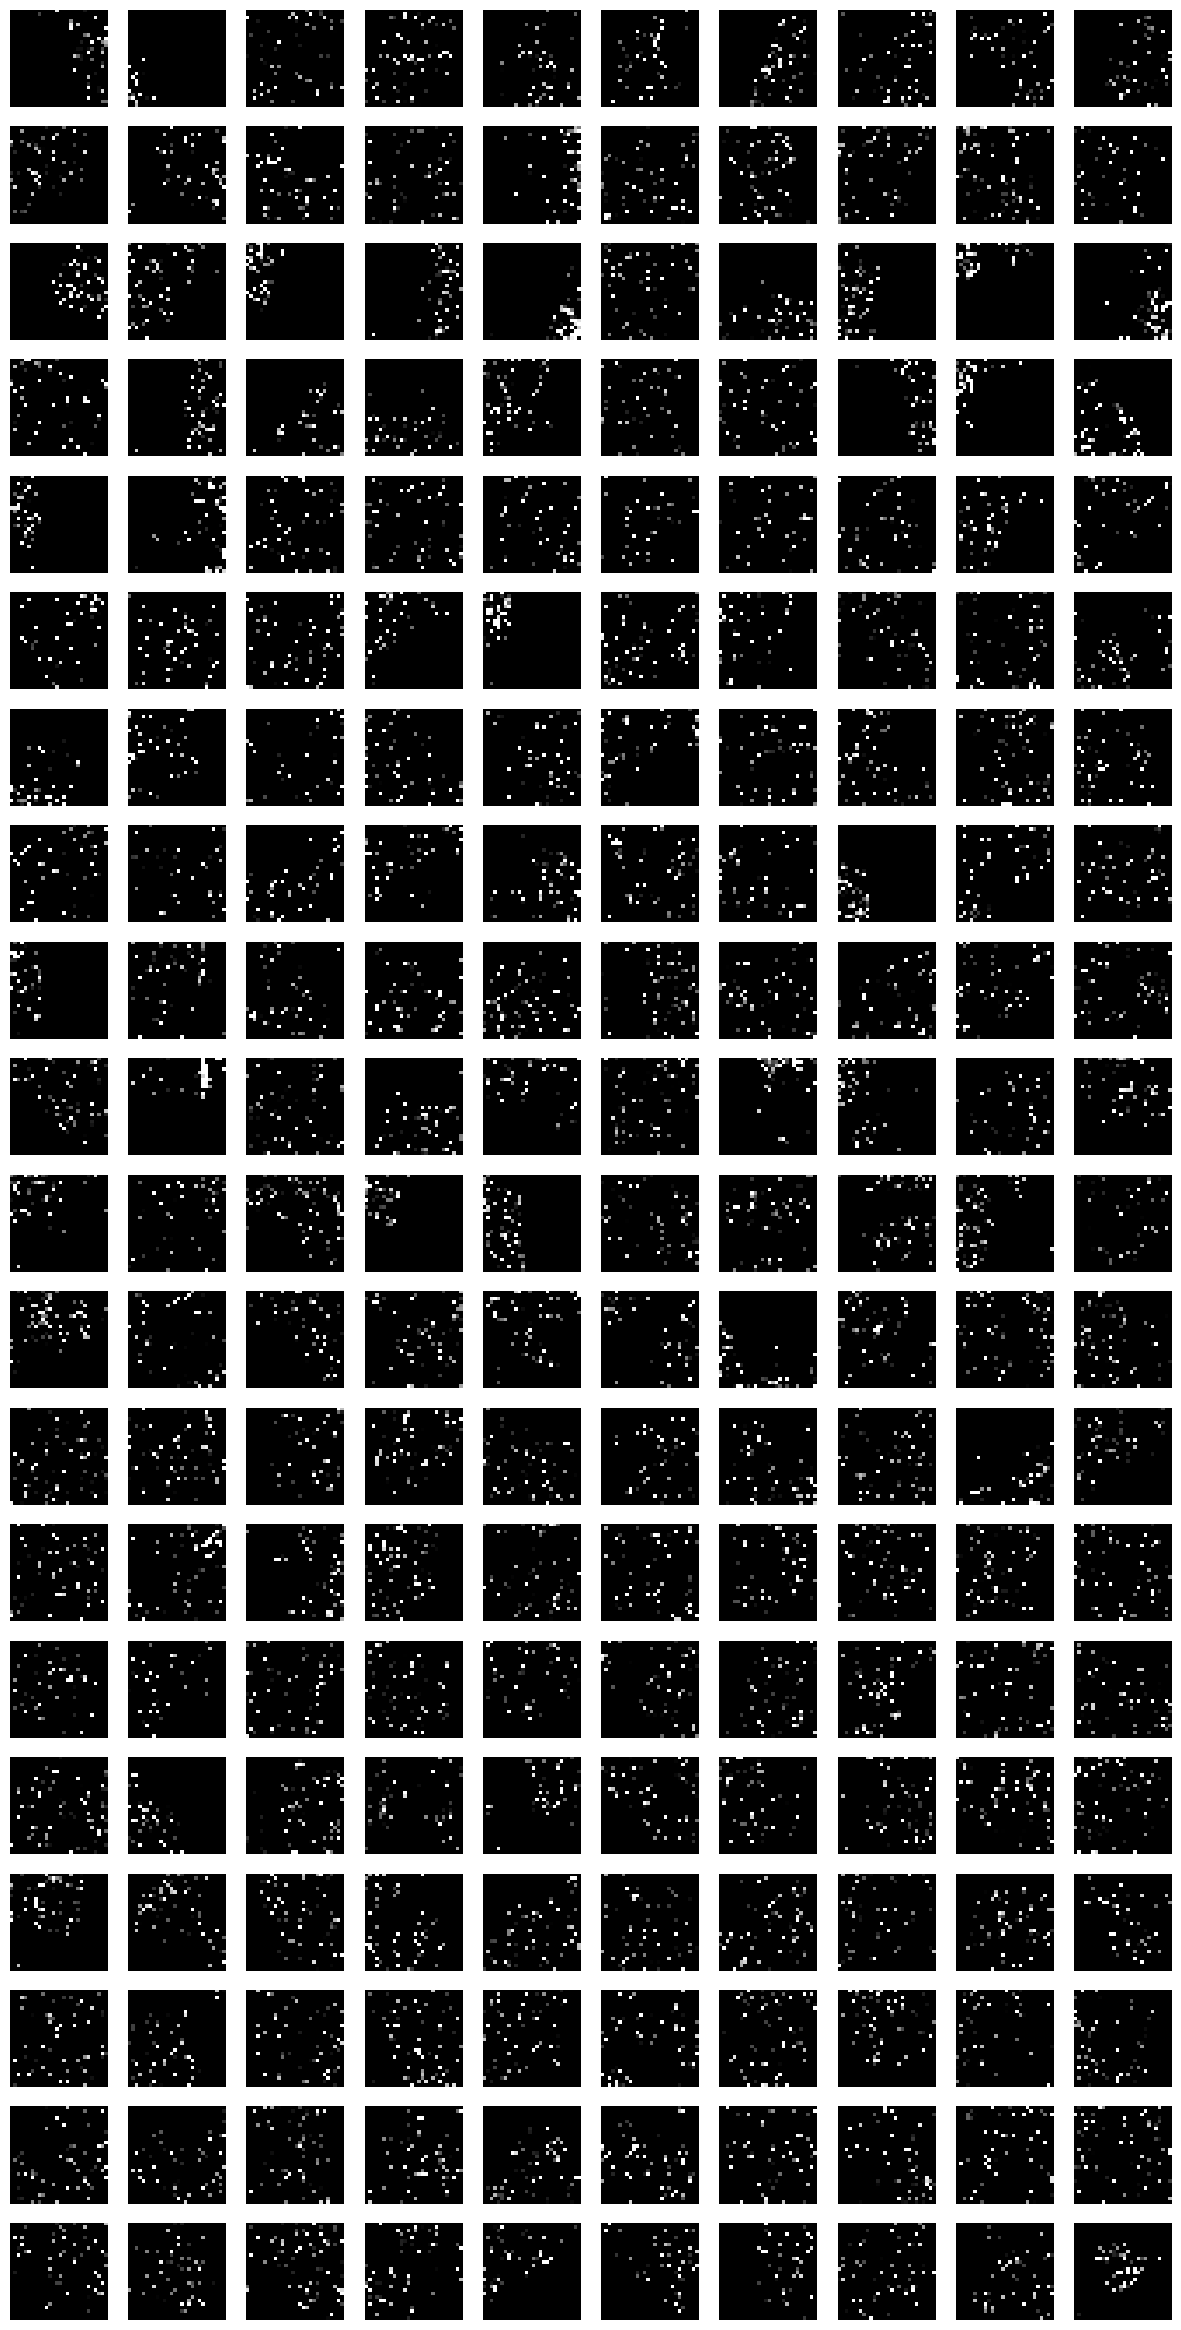

In [ ]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

def read_h5_images(h5_file):
    image_arrays = []
    with h5py.File(h5_file, 'r') as hf:
        keys = list(hf.keys())
        num_images = min(200, len(keys))

        for i in range(num_images):
            image_data = hf[keys[i]][()]
            image_arrays.append(image_data)

    return image_arrays

def display_images(image_arrays):
    num_images = len(image_arrays)
    num_rows = int(np.ceil(num_images / 10))
    fig, axes = plt.subplots(num_rows, 10, figsize=(15, num_rows * 1.5))

    for i in range(num_images):
        if num_rows > 1:
            ax = axes[i // 10, i % 10]
        else:
            ax = axes[i % 10]
        ax.imshow(image_arrays[i], cmap='gray')
        ax.axis('off')

    plt.show()

syndrome_images = read_h5_images('syndrome_data_200.h5')
non_syndrome_images = read_h5_images('non_syndrome_data_200.h5')

syndrome_images = np.array(syndrome_images) / 255
non_syndrome_images = np.array(non_syndrome_images) / 255

syndrome_labels = np.ones(len(syndrome_images))
non_syndrome_labels = np.zeros(len(non_syndrome_images))

print('Syndrome Images')
display_images(syndrome_images)
print('Non Syndrome Images')
display_images(non_syndrome_images)

# Load and Prepare MedViT Features (Experiment 3 Only)

Syndrome Images


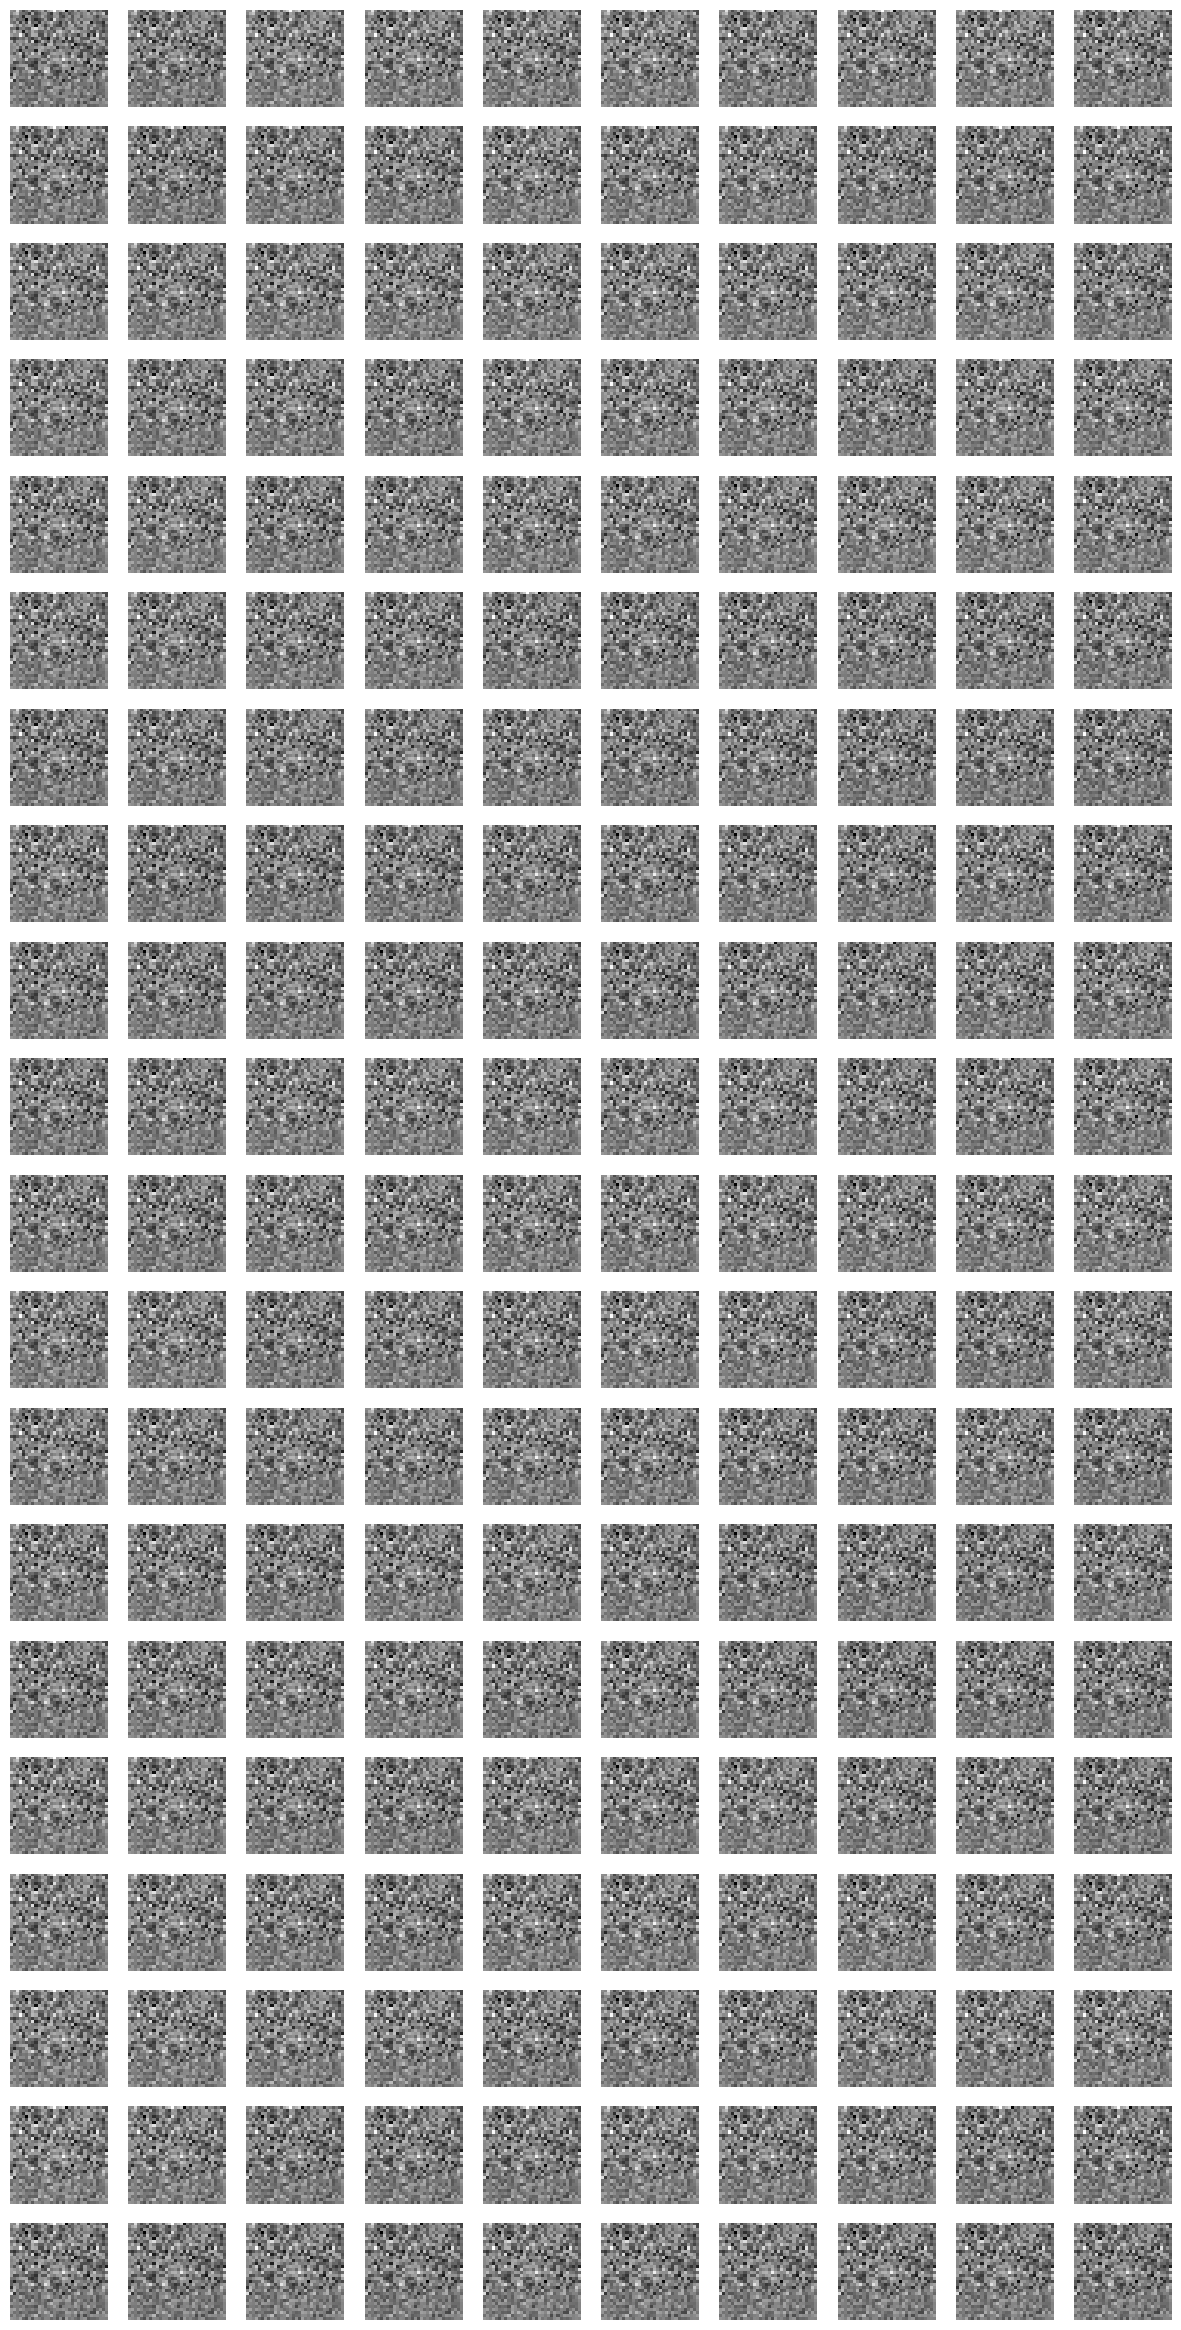

Non Syndrome Images


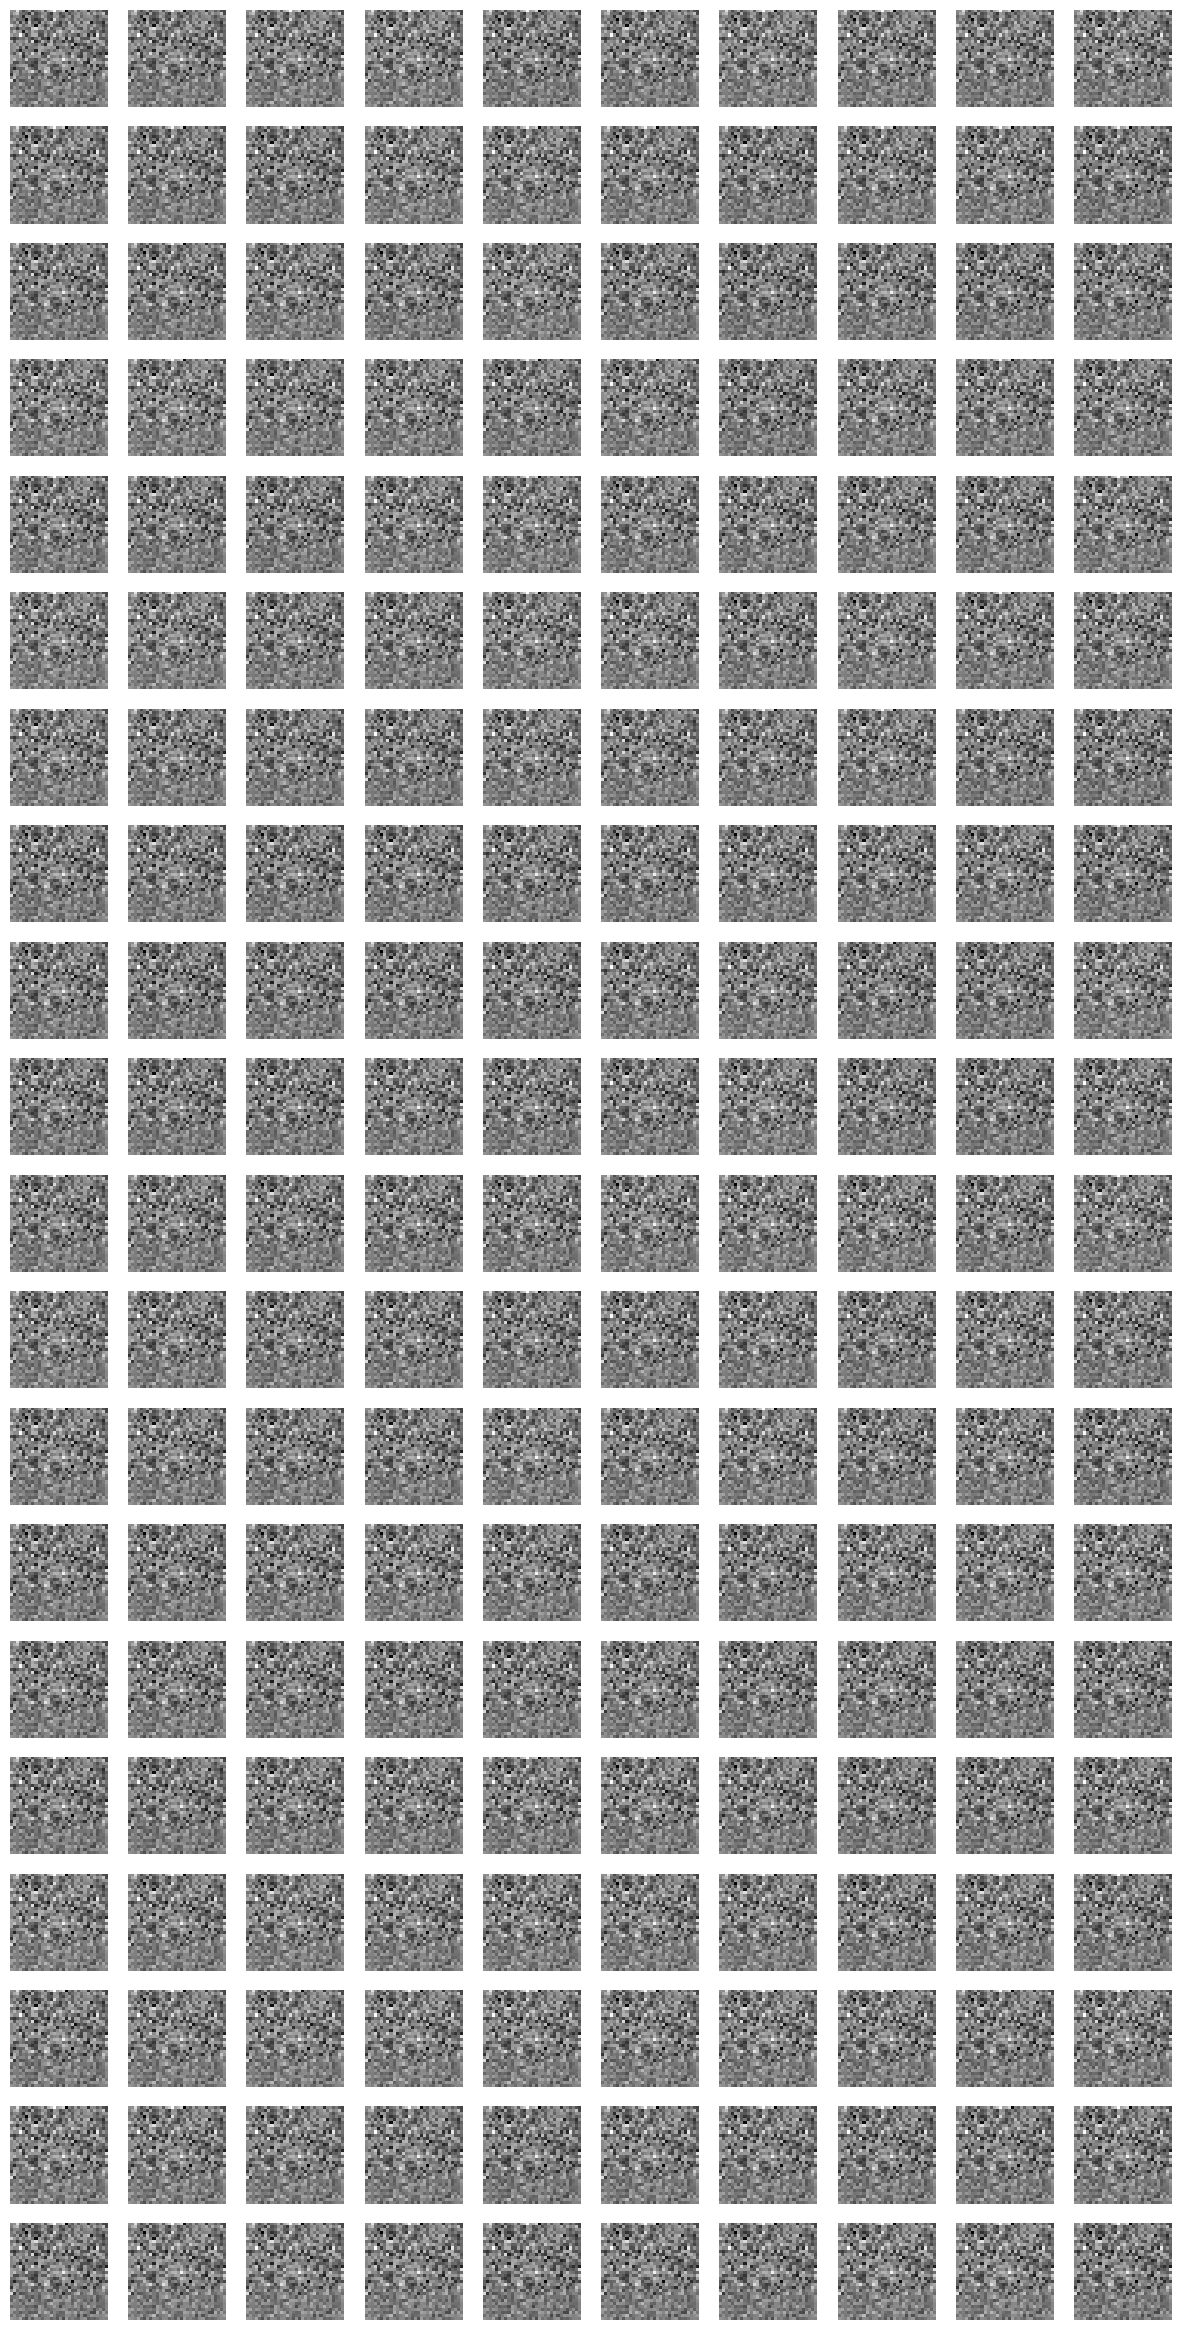

In [ ]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

def load_features(file_path):
    with h5py.File(file_path, 'r') as hf:
        features = np.array(hf['features'])
    return features


def display_images(image_arrays):
    num_images = len(image_arrays)
    num_rows = int(np.ceil(num_images / 10))
    fig, axes = plt.subplots(num_rows, 10, figsize=(15, num_rows * 1.5))

    for i in range(num_images):
        if num_rows > 1:
            ax = axes[i // 10, i % 10]
        else:
            ax = axes[i % 10]
        ax.imshow(image_arrays[i], cmap='gray')
        ax.axis('off')

    plt.show()

syndrome_features = load_features('syndrome_features.h5')
non_syndrome_features = load_features('non_syndrome_features.h5')

syndrome_features = np.reshape(syndrome_features, (200, 32, 32))
non_syndrome_features = np.reshape(non_syndrome_features, (200, 32, 32))

syndrome_images = np.array(syndrome_features) / 255
non_syndrome_images = np.array(non_syndrome_features) / 255

syndrome_labels = np.ones(len(syndrome_images))
non_syndrome_labels = np.zeros(len(non_syndrome_images))

print('Syndrome Images')
display_images(syndrome_images)
print('Non Syndrome Images')
display_images(non_syndrome_images)

# Data Augmentation Procedure (Experiment 4 Only)

In [ ]:
import numpy as np
from PIL import Image
from torchvision import transforms

def augment_data(images_array, num_augmentations=1):
    n, height, width = images_array.shape

    # Initialize an array to store augmented images
    augmented_images = np.zeros((n * (num_augmentations + 1), height, width))

    for i in range(n):
        # Original image
        augmented_images[i * (num_augmentations + 1)] = images_array[i]

        for j in range(num_augmentations):
            # Convert to PIL Image
            pil_image = Image.fromarray(images_array[i])

            # Define torchvision transformations for data augmentation
            data_transforms = transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation(degrees=(-15, 15)),
            ])

            # Apply torchvision transformations
            transformed_image = np.array(data_transforms(pil_image))

            # Store in the augmented array
            augmented_images[i * (num_augmentations + 1) + j + 1] = transformed_image

    return augmented_images

syndrome_images_augmented = augment_data(syndrome_images, num_augmentations=1)
non_syndrome_images_augmented = augment_data(non_syndrome_images, num_augmentations=1)

print("Shape of augmented syndrome images:", syndrome_images_augmented.shape)
print("Shape of augmented non-syndrome images:", non_syndrome_images_augmented.shape)

Streaming output truncated to the last 5000 lines.
[[[0.80392157 0.85098039 0.76078431 ... 0.05882353 0.14509804 0.16862745]
  [0.92156863 0.47058824 0.42745098 ... 0.2745098  0.10196078 0.03529412]
  [0.87058824 0.80392157 0.78431373 ... 0.16470588 0.25882353 0.14509804]
  ...
  [0.72156863 0.8745098  0.35686275 ... 0.0745098  0.25098039 0.57647059]
  [0.52941176 0.65490196 0.36078431 ... 0.76470588 0.30196078 0.05490196]
  [0.94901961 0.80784314 0.84705882 ... 0.71764706 0.30588235 0.16862745]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.03137255 ... 0.50588238 0.         0.        ]
  ...
  [0.         0.         0.60000002 ... 0.4509804  0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.2745098  0.2745098  0.21176471 ... 1.   

# Augmented Data Preparation

In [ ]:
syndrome_images = syndrome_images_augmented
non_syndrome_images = non_syndrome_images_augmented

syndrome_labels = np.ones(len(syndrome_images_augmented))
non_syndrome_labels = np.zeros(len(non_syndrome_images_augmented))

print(syndrome_labels)
print(non_syndrome_labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

# Prepare Dataset for Quantum Feature Extraction

In [ ]:
# Combine the data and labels
images = np.concatenate((syndrome_images, non_syndrome_images), axis=0)
labels = np.concatenate((syndrome_labels, non_syndrome_labels), axis=0)

# Add a new axis to train_images and test_images
images = images[..., tf.newaxis]

# Verify the shapes of the resulting TensorFlow tensors
print("Images Shape (with extra dimension):", images.shape)

Images Shape (with extra dimension): (400, 32, 32, 1)


# Define QNN Quanvolutional Random Layers Circuit

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

n_layers=1

SAVE_PATH = "quanvolution/"
np.random.seed(0)
tf.random.set_seed(0)

dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

drawer = qml.draw(circuit)
print(drawer([0, 0, 0, 0]))

0: ──RY(0.00)─╭RandomLayers(M0)─┤  <Z>
1: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
2: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
3: ──RY(0.00)─╰RandomLayers(M0)─┤  <Z>

M0 = 
[[3.72495259 5.30467815 5.3906313  5.32343968]]


# Define Quanvolutional Layer

In [ ]:
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((16, 16, 4))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 32, 2):
        for k in range(0, 32, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

# Start Quanvolutional Processing

In [ ]:
q_images = []
print("Quantum pre-processing of images:")
for idx, img in enumerate(images):
    print("{}/{}".format(idx + 1, len(images)))
    q_images.append(quanv(img))
q_images = np.asarray(q_images)

# Save pre-processed images
np.save(SAVE_PATH + "q_images_32.npy", q_images)

Quantum pre-processing of images:
1/400
2/400
3/400
4/400
5/400
6/400
7/400
8/400
9/400
10/400
11/400
12/400
13/400
14/400
15/400
16/400
17/400
18/400
19/400
20/400
21/400
22/400
23/400
24/400
25/400
26/400
27/400
28/400
29/400
30/400
31/400
32/400
33/400
34/400
35/400
36/400
37/400
38/400
39/400
40/400
41/400
42/400
43/400
44/400
45/400
46/400
47/400
48/400
49/400
50/400
51/400
52/400
53/400
54/400
55/400
56/400
57/400
58/400
59/400
60/400
61/400
62/400
63/400
64/400
65/400
66/400
67/400
68/400
69/400
70/400
71/400
72/400
73/400
74/400
75/400
76/400
77/400
78/400
79/400
80/400
81/400
82/400
83/400
84/400
85/400
86/400
87/400
88/400
89/400
90/400
91/400
92/400
93/400
94/400
95/400
96/400
97/400
98/400
99/400
100/400
101/400
102/400
103/400
104/400
105/400
106/400
107/400
108/400
109/400
110/400
111/400
112/400
113/400
114/400
115/400
116/400
117/400
118/400
119/400
120/400
121/400
122/400
123/400
124/400
125/400
126/400
127/400
128/400
129/400
130/400
131/400
132/400
133/400
134/400
13

# Circuit for Second Quanvolutional Layer (Experiment 5 Only)

In [ ]:
dev = qml.device("default.qubit", wires=16)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 16))

@qml.qnode(dev)
def circuit2(phi):
    # Encoding of 16 classical input values
    for j in range(16):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(16)))

    # Measurement producing 16 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(16)]

drawer = qml.draw(circuit2)
print(drawer([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

 0: ──RY(0.00)─╭RandomLayers(M0)─┤  <Z>
 1: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
 2: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
 3: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
 4: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
 5: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
 6: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
 7: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
 8: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
 9: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
10: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
11: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
12: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
13: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
14: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
15: ──RY(0.00)─╰RandomLayers(M0)─┤  <Z>

M0 = 
[[5.96633089 4.16277908 0.0852731  3.91345744 4.23272829 6.10691056
  5.51785232 3.2020644  0.35006574 2.83471695 0.12558621 2.77535157
  6.15492494 2.25845617 3.02154317 4.32698583]]


# Second Quanvolutional Layer (Experiment 5 Only)

In [ ]:
def quanv2(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((8, 8, 16))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 16, 2):
        for k in range(0, 16, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit2(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0],
                    image[j, k, 1],
                    image[j, k + 1, 1],
                    image[j + 1, k, 1],
                    image[j + 1, k + 1, 1],
                    image[j, k, 2],
                    image[j, k + 1, 2],
                    image[j + 1, k, 2],
                    image[j + 1, k + 1, 2],
                    image[j, k, 3],
                    image[j, k + 1, 3],
                    image[j + 1, k, 3],
                    image[j + 1, k + 1, 3]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(16):
                out[j // 2, k // 2, c] = q_results[c]
    return out

# Quantum Feature Extraction with 2 Quanvolutional Layers (Experiment 5 Only)

In [ ]:
q_images = []
print("Quantum pre-processing of images:")
for idx, img in enumerate(images):
    print("{}/{}".format(idx + 1, len(images)))
    q_images.append(quanv2(quanv(img)))
q_images = np.asarray(q_images)

# Save pre-processed images
np.save(SAVE_PATH + "q_images_32_Q2.npy", q_images)

Quantum pre-processing of images:
1/400
2/400
3/400
4/400
5/400
6/400
7/400
8/400
9/400
10/400
11/400
12/400
13/400
14/400
15/400
16/400
17/400
18/400
19/400
20/400
21/400
22/400
23/400
24/400
25/400
26/400
27/400
28/400
29/400
30/400
31/400
32/400
33/400
34/400
35/400
36/400
37/400
38/400
39/400
40/400
41/400
42/400
43/400
44/400
45/400
46/400
47/400
48/400
49/400
50/400
51/400
52/400
53/400
54/400
55/400
56/400
57/400
58/400
59/400
60/400
61/400
62/400
63/400
64/400
65/400
66/400
67/400
68/400
69/400
70/400
71/400
72/400
73/400
74/400
75/400
76/400
77/400
78/400
79/400
80/400
81/400
82/400
83/400
84/400
85/400
86/400
87/400
88/400
89/400
90/400
91/400
92/400
93/400
94/400
95/400
96/400
97/400
98/400
99/400
100/400
101/400
102/400
103/400
104/400
105/400
106/400
107/400
108/400
109/400
110/400
111/400
112/400
113/400
114/400
115/400
116/400
117/400
118/400
119/400
120/400
121/400
122/400
123/400
124/400
125/400
126/400
127/400
128/400
129/400
130/400
131/400
132/400
133/400
134/400
13

# Persist Quantum Extracted Features

In [ ]:
# Load pre-processed images
q_images = np.load(SAVE_PATH + "q_images_32.npy")

# Plot Quantum Extracted Features

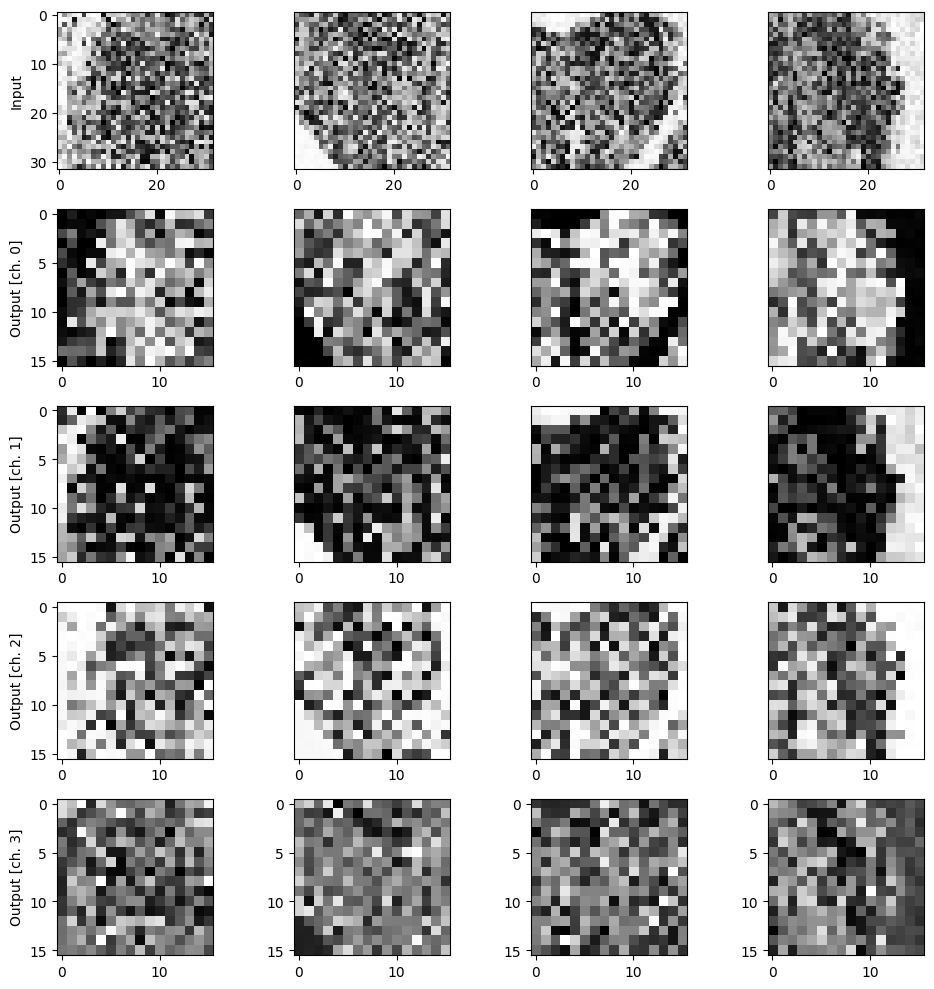

In [ ]:
def plot_quanv_features():
    n_samples = 4
    n_channels = 4
    fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
    for k in range(n_samples):
        axes[0, 0].set_ylabel("Input")
        if k != 0:
            axes[0, k].yaxis.set_visible(False)
        axes[0, k].imshow(images[k, :, :, 0], cmap="gray")

        # Plot all output channels
        for c in range(n_channels):
            axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
            if k != 0:
                axes[c, k].yaxis.set_visible(False)
            axes[c + 1, k].imshow(q_images[k, :, :, c], cmap="gray")

    plt.tight_layout()
    plt.show()

plot_quanv_features()

# Cross-Validation Training Loop, Training Loop and Evaluation Function

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

# Function to train the definite model
def train_model(model, dataloader, criterion, optimizer, num_epochs=10, lambda_reg=0.01):
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)

            # Add L2 regularization term to the loss
            l2_regularization = 0.0
            for param in model.parameters():
                l2_regularization += torch.norm(param, p=2)

            loss += lambda_reg * l2_regularization

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(dataloader)
        train_losses.append(epoch_loss)
        #print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

    return train_losses

def train_model_with_cross_validation(model, dataset, criterion, optimizer, num_epochs=10, num_folds=5, lambda_reg=0.01):
    train_losses = []
    val_losses = []

    accuracies = []

    # Create KFold cross-validation iterator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    for fold, (train_indices, val_indices) in enumerate(kf.split(dataset)):
        #print(f"Fold {fold + 1}/{num_folds}")

        # Create data loaders for this fold
        train_subset = torch.utils.data.Subset(dataset, train_indices)
        val_subset = torch.utils.data.Subset(dataset, val_indices)

        train_dataloader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True)
        val_dataloader = torch.utils.data.DataLoader(val_subset, batch_size=32, shuffle=False)

        # Reset the model for each fold
        for layer in model.children():
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()

        fold_train_losses = []  # Training losses for this fold
        fold_val_losses = []  # Validation losses for this fold

        fold_accuracies = []

        for epoch in range(num_epochs):
            model.train()
            train_running_loss = 0.0

            for inputs, labels in train_dataloader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), labels)

                # Add L2 regularization term to the loss
                l2_regularization = 0.0
                for param in model.parameters():
                    l2_regularization += torch.norm(param, p=2)

                loss += lambda_reg * l2_regularization

                loss.backward()
                optimizer.step()

                train_running_loss += loss.item()

            train_epoch_loss = train_running_loss / len(train_dataloader)
            fold_train_losses.append(train_epoch_loss)
            #print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_epoch_loss:.4f}')

            model.eval()
            val_running_loss = 0.0

            epoch_labels = []
            epoch_preds = []

            with torch.no_grad():
                for inputs, labels in val_dataloader:
                    outputs = model(inputs)
                    preds = (outputs.squeeze() > 0.5).int()
                    epoch_preds.extend(preds.numpy())
                    epoch_labels.extend(labels.numpy())

                    loss = criterion(outputs.squeeze(), labels)
                    val_running_loss += loss.item()

            epoch_accuracy = accuracy_score(epoch_labels, epoch_preds)

            val_epoch_loss = val_running_loss / len(val_dataloader)
            fold_val_losses.append(val_epoch_loss)

            fold_accuracies.append(epoch_accuracy)

            #print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_epoch_loss:.4f}')

        train_losses.append(fold_train_losses)
        val_losses.append(fold_val_losses)

        accuracies.append(fold_accuracies)

    return train_losses, val_losses, accuracies

# Function to evaluate the model
def evaluate_model(model, dataloader, original_test_data):
    model.eval()
    all_preds, all_labels = [], []

    misclassified_idxs = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            preds = (outputs.squeeze() > 0.5).int()
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

            # Check if the prediction is incorrect
            for i, (pred, label) in enumerate(zip(preds, labels)):
                if pred != label:
                    misclassified_idxs.append(i)

    misclassified_images = original_test_data[misclassified_idxs]

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)

    cm = confusion_matrix(all_labels, all_preds)

    return accuracy, precision, recall, f1, cm, misclassified_images

# MLP (QNN) and CNN Architectures

The MLP is used with the Quantum Extracted Features, which means, the previous Quanvolutional layer plus this MLP conform the QNN Architecture.

The ConvMLP architecture is the classical CNN.

In [ ]:
import torch.nn as nn

# The MLP is to be used with the Quantum Extracted Features
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.5):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return self.sigmoid(x)

# ConvMLP is to be used as a classical CNN
class ConvMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.5):
        super(ConvMLP, self).__init__()
        self.conv = nn.Conv2d(1, 4, kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 1, 32, 32)
        x = self.conv(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return self.sigmoid(x)


# Training Pipeline + Reporting Functions

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from collections import defaultdict

def train_with_multiple_splits(model, num_splits, images, labels, params):

    lr = params[0]
    dropout_rate = params[1]
    lambda_reg = params[2]
    hidden_size = params[3]

    # Lists to store evaluation metrics and loss curves for each split
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    all_train_avg_loss_curves = []
    all_valid_avg_loss_curves = []
    all_avg_accuracies_curves = []
    min_losses = []
    cms = []
    misclassified_images_freqs = defaultdict(int) # won't be used by external function

    # Define a function to train and evaluate the model for one split
    def train_and_evaluate(split_idx, images, labels):
        print(f"Training and evaluating split {split_idx + 1}")

        indices = np.arange(len(images))
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test, _, idxs_test = train_test_split(images, labels, indices, test_size=0.2, random_state=split_idx, stratify=labels)
        original_test_data = images[idxs_test]

        # Standardize the features using PyTorch tensors
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Convert data to PyTorch tensors
        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

        # Create datasets and dataloaders
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

        train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)
        test_dataloader = DataLoader(test_dataset, batch_size=40, shuffle=False)

        # Instantiate the new MLP model
        input_size = X_train.shape[1]
        output_size = 1
        mlp_model = model(input_size, hidden_size, output_size, dropout_rate)

        # Define loss function and optimizer
        criterion_mlp = nn.BCELoss()
        optimizer_mlp = optim.Adam(mlp_model.parameters(), lr=lr)


        # Train the model
        train_losses_mlp, val_losses_mlp, accuracies_mlp = train_model_with_cross_validation(mlp_model, train_dataset, criterion_mlp, optimizer_mlp, num_epochs=30, num_folds=5, lambda_reg=lambda_reg)
        avg_train_losses = np.mean(train_losses_mlp, axis=0)
        avg_val_losses = np.mean(val_losses_mlp, axis=0)
        avg_accuracies = np.mean(accuracies_mlp, axis=0)

        # Store the loss curve for this split
        all_train_avg_loss_curves.append(avg_train_losses)
        all_valid_avg_loss_curves.append(avg_val_losses)
        all_avg_accuracies_curves.append(avg_accuracies)

        num_epochs = np.argmin(avg_val_losses) + 1
        print('Optimal Epochs:', num_epochs)

        # Definite model: 5 epochs
        mlp_model = model(input_size, hidden_size, output_size, dropout_rate)
        optimizer_mlp = optim.Adam(mlp_model.parameters(), lr=lr)
        train_losses_mlp = train_model(mlp_model, train_dataloader, criterion_mlp, optimizer_mlp, num_epochs=num_epochs, lambda_reg=lambda_reg)

        min_loss = np.min(train_losses_mlp)
        min_losses.append(min_loss)

        # Evaluate the model
        accuracy, precision, recall, f1, cm, misclassified_images = evaluate_model(mlp_model, test_dataloader, original_test_data)
        for image_id in misclassified_images:
            misclassified_images_freqs[str(image_id)] += 1

        cms.append(cm)

        # Store evaluation metrics for this split
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    # Flatten the features
    images_flat = images.reshape(images.shape[0], -1)

    # Run the training and evaluation loop for multiple splits
    for split_idx in range(num_splits):
        train_and_evaluate(split_idx, images_flat, labels)

    avg_train_loss_curve = np.mean(all_train_avg_loss_curves, axis=0)
    avg_valid_loss_curve = np.mean(all_valid_avg_loss_curves, axis=0)
    avg_accuracy_curve = np.mean(all_avg_accuracies_curves, axis=0)

    return accuracy_list, precision_list, recall_list, f1_list, min_losses, cms, avg_train_loss_curve, avg_valid_loss_curve, avg_accuracy_curve


def report(accuracy_list, precision_list, recall_list, f1_list, min_losses, cms, num_splits):

    # Calculate and print average metrics
    avg_accuracy = sum(accuracy_list) / len(accuracy_list)
    avg_precision = sum(precision_list) / len(precision_list)
    avg_recall = sum(recall_list) / len(recall_list)
    avg_f1 = sum(f1_list) / len(f1_list)
    avg_min_loss = sum(min_losses) / len(min_losses)
    avg_cm = sum(cms) / num_splits

    std_accuracy = np.std(np.array(accuracy_list))
    std_precision = np.std(np.array(precision_list))
    std_recall = np.std(np.array(recall_list))
    std_f1 = np.std(np.array(f1_list))
    std_min_loss = np.std(np.array(min_losses))
    std_cm = np.array([[np.std([cm[0, 0] for cm in cms]), np.std([cm[0, 1] for cm in cms])],
                    [np.std([cm[1, 0] for cm in cms]), np.std([cm[1, 1] for cm in cms])]])

    best_idx = np.argmax(np.array(f1_list))

    best_accuracy = accuracy_list[best_idx]
    best_precision = precision_list[best_idx]
    best_recall = recall_list[best_idx]
    best_f1 = f1_list[best_idx]
    best_min_loss = min_losses[best_idx]
    best_cm = cms[best_idx]

    print()
    print(f'Average Accuracy: {avg_accuracy:.8f}')
    print(f'Average Precision: {avg_precision:.8f}')
    print(f'Average Recall: {avg_recall:.8f}')
    print(f'Average F1 Score: {avg_f1:.8f}')
    print(f'Average Min Avg Loss: {avg_min_loss:.8f}')
    print(f'Average Confusion Matrix: {avg_cm}')
    print()

    print(f'Std Accuracy: {std_accuracy:.8f}')
    print(f'Std Precision: {std_precision:.8f}')
    print(f'Std Recall: {std_recall:.8f}')
    print(f'Std F1 Score: {std_f1:.8f}')
    print(f'Std Min Avg Train Loss: {std_min_loss:.8f}')
    print(f'Std Confusion Matrix: {std_cm}')
    print()

    return avg_cm

def plot_multiple_splits_loss_curve(avg_train_loss_curve, avg_valid_loss_curve, title):

    # Set up the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot loss curves for each model
    plt.plot(avg_train_loss_curve, label='Average Training Loss', marker='o', color='mediumblue', linestyle='-')
    plt.plot(avg_valid_loss_curve, label='Average Validation Loss', marker='o', color='crimson', linestyle='-')

    # Set labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss')
    plt.title(f'{title} - Cross-Validation Loss Curves')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

def plot_multiple_splits_accuracy_curve(avg_accuracy_curve, title):

    # Set up the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot loss curves for each model
    plt.plot(avg_accuracy_curve, label='Average Validation Accuracy', marker='o', color='mediumturquoise', linestyle='-')

    # Set labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Average Accuracy')
    plt.title(f'{title} - Cross-Validation Accuracy Curve')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

def plot_multiple_splits_cms(avg_cm, title):

    # Plot Confusion Matrix
    plt.imshow(avg_cm, interpolation='nearest', cmap=plt.cm.RdPu)
    plt.title(f'{title} - Confusion Matrix (Test Dataset)')
    plt.colorbar()
    plt.xticks([0, 1], ['Non-Syndrome', 'Syndrome'])
    plt.yticks([0, 1], ['Non-Syndrome', 'Syndrome'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def plot_accuracy_curves(accuracy_curves, title):

    # Set up the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot loss curves for each model
    plt.plot(accuracy_curves[0], label='CNN', marker='o', color='dodgerblue', linestyle='-')
    plt.plot(accuracy_curves[1], label='QNN', marker='o', color='mediumvioletred', linestyle='-')

    # Set labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Validation Accuracy Curves')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

def plot_loss_curves(loss_curves, title):

    # Set up the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot loss curves for each model
    plt.plot(loss_curves[0], label='CNN', marker='o', color='dodgerblue', linestyle='-')
    plt.plot(loss_curves[1], label='QNN', marker='o', color='mediumvioletred', linestyle='-')

    # Set labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title} - Validation Loss Curves')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

# CNN Grid Search

In [ ]:
from itertools import product

num_splits = 5

# Define the hyperparameter grid
learning_rates = [0.005, 0.001]
dropout_rates = [0.3, 0.5]
lambda_reg_values = [0.001, 0.01]
hidden_sizes = [32, 64, 128]

# Create all possible combinations of hyperparameters
hyperparameter_combinations = list(product(learning_rates, dropout_rates, lambda_reg_values, hidden_sizes))

# Perform grid search
best_f1_score = 0.0
best_params = None

for i, params in enumerate(hyperparameter_combinations):
    print(f'{i+1}/{len(hyperparameter_combinations)}')
    print(params)
    _, _, _, f1_list, _, _, _, _, _ = train_with_multiple_splits(ConvMLP, num_splits, images, labels, list(params))

    # Calculate average F1 score across all splits
    avg_f1_score = sum(f1_list) / num_splits

    print(avg_f1_score)
    print()

    # Update best hyperparameters if the current combination performs better
    if avg_f1_score > best_f1_score:
        best_f1_score = avg_f1_score
        best_params = params

print("Best Hyperparameters (CNN):", best_params)
print("Best F1 Score:", best_f1_score)

1/24
(0.005, 0.3, 0.001, 32)
Training and evaluating split 1
Optimal Epochs: 2
Training and evaluating split 2
Optimal Epochs: 2
Training and evaluating split 3
Optimal Epochs: 2
Training and evaluating split 4
Optimal Epochs: 2
Training and evaluating split 5
Optimal Epochs: 1
0.6891436071140806

2/24
(0.005, 0.3, 0.001, 64)
Training and evaluating split 1
Optimal Epochs: 1
Training and evaluating split 2
Optimal Epochs: 1
Training and evaluating split 3
Optimal Epochs: 1
Training and evaluating split 4
Optimal Epochs: 2
Training and evaluating split 5
Optimal Epochs: 1
0.6966831991228333

3/24
(0.005, 0.3, 0.001, 128)
Training and evaluating split 1
Optimal Epochs: 1
Training and evaluating split 2
Optimal Epochs: 1
Training and evaluating split 3
Optimal Epochs: 1
Training and evaluating split 4
Optimal Epochs: 2
Training and evaluating split 5
Optimal Epochs: 1
0.6804982019079022

4/24
(0.005, 0.3, 0.01, 32)
Training and evaluating split 1
Optimal Epochs: 1
Training and evaluating 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Optimal Epochs: 2
Training and evaluating split 5
Optimal Epochs: 1
0.5296217258658573

6/24
(0.005, 0.3, 0.01, 128)
Training and evaluating split 1
Optimal Epochs: 2
Training and evaluating split 2
Optimal Epochs: 2
Training and evaluating split 3
Optimal Epochs: 1
Training and evaluating split 4
Optimal Epochs: 2
Training and evaluating split 5
Optimal Epochs: 1
0.6324051210656205

7/24
(0.005, 0.5, 0.001, 32)
Training and evaluating split 1
Optimal Epochs: 2
Training and evaluating split 2
Optimal Epochs: 3
Training and evaluating split 3
Optimal Epochs: 2
Training and evaluating split 4
Optimal Epochs: 2
Training and evaluating split 5
Optimal Epochs: 3
0.6581082377454418

8/24
(0.005, 0.5, 0.001, 64)
Training and evaluating split 1
Optimal Epochs: 2
Training and evaluating split 2
Optimal Epochs: 2
Training and evaluating split 3
Optimal Epochs: 2
Training and evaluating split 4
Optimal Epochs: 2
Training and evaluating split 5
Optimal Epochs: 1
0.658415424238209

9/24
(0.005, 0.5

# CNN Training and Evaluation

Training and evaluating split 1
Optimal Epochs: 2
Training and evaluating split 2
Optimal Epochs: 2
Training and evaluating split 3
Optimal Epochs: 2
Training and evaluating split 4
Optimal Epochs: 2
Training and evaluating split 5
Optimal Epochs: 1
Training and evaluating split 6
Optimal Epochs: 2
Training and evaluating split 7
Optimal Epochs: 2
Training and evaluating split 8
Optimal Epochs: 2
Training and evaluating split 9
Optimal Epochs: 3
Training and evaluating split 10
Optimal Epochs: 2

Average Accuracy: 0.69000000
Average Precision: 0.70399016
Average Recall: 0.66250000
Average F1 Score: 0.67933588
Average Min Avg Loss: 0.55195277
Average Confusion Matrix: [[28.7 11.3]
 [13.5 26.5]]

Std Accuracy: 0.03699662
Std Precision: 0.04454081
Std Recall: 0.07846177
Std F1 Score: 0.04724284
Std Min Avg Train Loss: 0.07859770
Std Confusion Matrix: [[2.60959767 2.60959767]
 [3.13847097 3.13847097]]



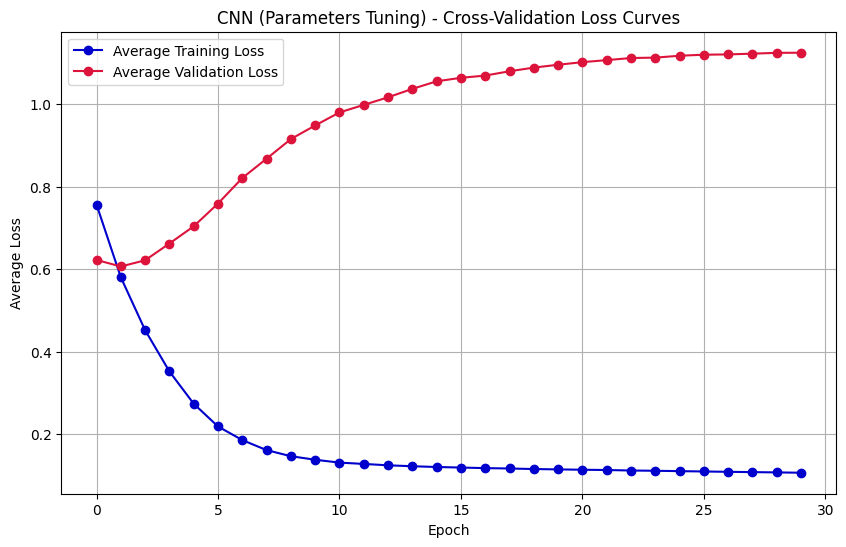

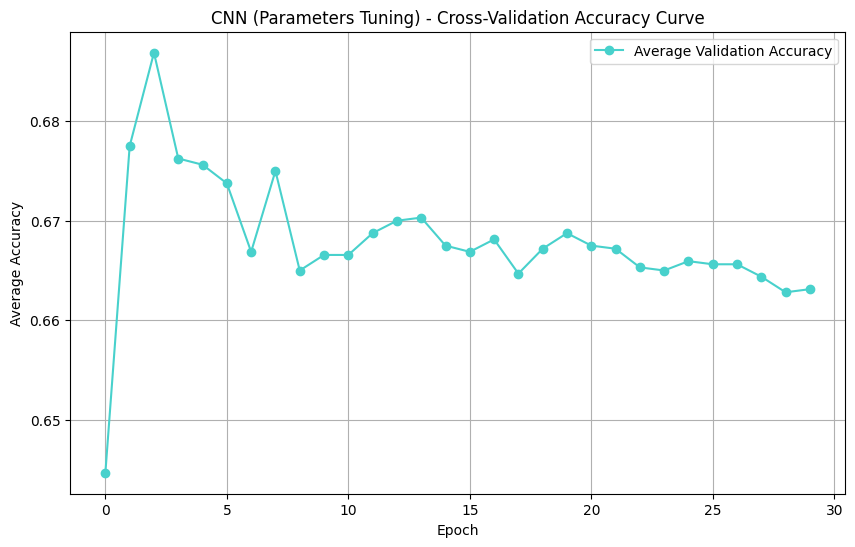

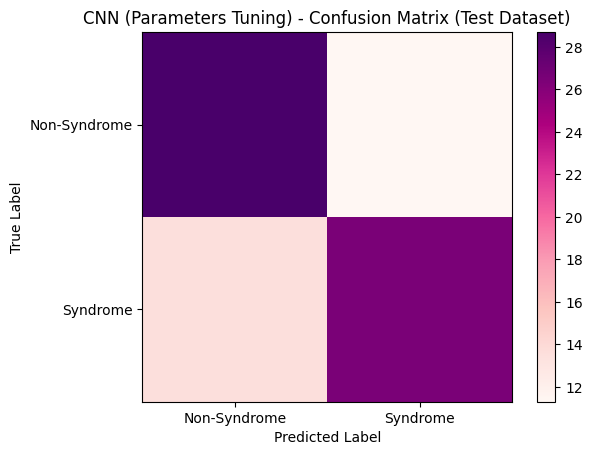

In [ ]:
# @title Default title text
num_splits = 10

params = best_params

accuracy_list, precision_list, recall_list, f1_list, min_losses, cms, avg_train_loss_curve, avg_valid_loss_curve, avg_accuracy_curve = train_with_multiple_splits(ConvMLP, num_splits, images, labels, params)

avg_cm = report(accuracy_list, precision_list, recall_list, f1_list, min_losses, cms, num_splits)

plot_multiple_splits_loss_curve(avg_train_loss_curve, avg_valid_loss_curve, title='CNN (Parameters Tuning)')

plot_multiple_splits_accuracy_curve(avg_accuracy_curve, title='CNN (Parameters Tuning)')

plot_multiple_splits_cms(avg_cm, title='CNN (Parameters Tuning)')


# QNN Grid Search

In [ ]:
from itertools import product

num_splits = 5

# Define the hyperparameter grid
learning_rates = [0.005, 0.001]
dropout_rates = [0.3, 0.5]
lambda_reg_values = [0.001, 0.01]
hidden_sizes = [32, 64, 128]

# Create all possible combinations of hyperparameters
hyperparameter_combinations = list(product(learning_rates, dropout_rates, lambda_reg_values, hidden_sizes))

# Perform grid search
best_f1_score = 0.0
best_params = None

for i, params in enumerate(hyperparameter_combinations):
    print(f'{i+1}/{len(hyperparameter_combinations)}')
    print(params)
    _, _, _, f1_list, _, _, _, _, _ = train_with_multiple_splits(MLP, num_splits, q_images, labels, list(params))

    # Calculate average F1 score across all splits
    avg_f1_score = sum(f1_list) / num_splits

    print(avg_f1_score)
    print()

    # Update best hyperparameters if the current combination performs better
    if avg_f1_score > best_f1_score:
        best_f1_score = avg_f1_score
        best_params = params

print("Best Hyperparameters (QNN):", best_params)
print("Best F1 Score:", best_f1_score)

1/24
(0.005, 0.3, 0.001, 32)
Training and evaluating split 1
Optimal Epochs: 1
Training and evaluating split 2
Optimal Epochs: 1
Training and evaluating split 3
Optimal Epochs: 1
Training and evaluating split 4
Optimal Epochs: 1
Training and evaluating split 5
Optimal Epochs: 1
0.7316675402498145

2/24
(0.005, 0.3, 0.001, 64)
Training and evaluating split 1
Optimal Epochs: 1
Training and evaluating split 2
Optimal Epochs: 1
Training and evaluating split 3
Optimal Epochs: 1
Training and evaluating split 4
Optimal Epochs: 1
Training and evaluating split 5
Optimal Epochs: 1
0.7082230277475323

3/24
(0.005, 0.3, 0.001, 128)
Training and evaluating split 1
Optimal Epochs: 1
Training and evaluating split 2
Optimal Epochs: 1
Training and evaluating split 3
Optimal Epochs: 1
Training and evaluating split 4
Optimal Epochs: 1
Training and evaluating split 5
Optimal Epochs: 1
0.716024033961068

4/24
(0.005, 0.3, 0.01, 32)
Training and evaluating split 1
Optimal Epochs: 1
Training and evaluating s

# QNN Training and Evaluation

Training and evaluating split 1
Optimal Epochs: 4
Training and evaluating split 2
Optimal Epochs: 4
Training and evaluating split 3
Optimal Epochs: 4
Training and evaluating split 4
Optimal Epochs: 4
Training and evaluating split 5
Optimal Epochs: 3
Training and evaluating split 6
Optimal Epochs: 4
Training and evaluating split 7
Optimal Epochs: 3
Training and evaluating split 8
Optimal Epochs: 4
Training and evaluating split 9
Optimal Epochs: 4
Training and evaluating split 10
Optimal Epochs: 4

Average Accuracy: 0.73250000
Average Precision: 0.73832343
Average Recall: 0.72250000
Average F1 Score: 0.72920578
Average Min Avg Loss: 0.31809066
Average Confusion Matrix: [[29.7 10.3]
 [11.1 28.9]]

Std Accuracy: 0.03674235
Std Precision: 0.04004196
Std Recall: 0.05640257
Std F1 Score: 0.03978096
Std Min Avg Train Loss: 0.03436861
Std Confusion Matrix: [[1.95192213 1.95192213]
 [2.25610283 2.25610283]]



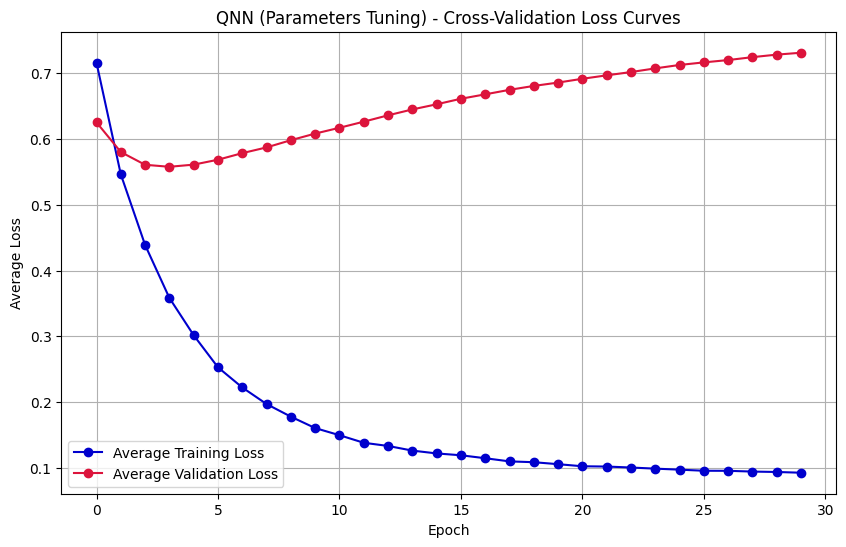

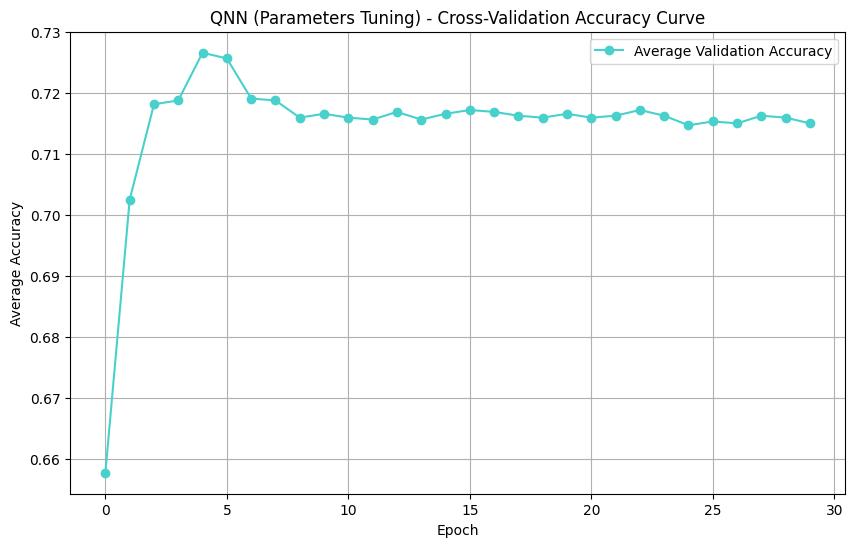

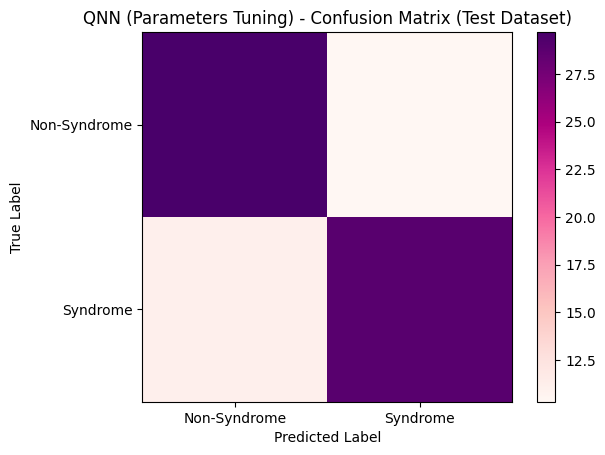

In [ ]:
num_splits = 10

params = best_params

q_accuracy_list, q_precision_list, q_recall_list, q_f1_list, q_min_losses, q_cms, q_avg_train_loss_curve, q_avg_valid_loss_curve, q_avg_accuracy_curve = train_with_multiple_splits(MLP, num_splits, q_images, labels, params)

q_avg_cm = report(q_accuracy_list, q_precision_list, q_recall_list, q_f1_list, q_min_losses, q_cms, num_splits)

plot_multiple_splits_loss_curve(q_avg_train_loss_curve, q_avg_valid_loss_curve, title='QNN (Parameters Tuning)')

plot_multiple_splits_accuracy_curve(q_avg_accuracy_curve, title='QNN (Parameters Tuning)')

plot_multiple_splits_cms(q_avg_cm, title='QNN (Parameters Tuning)')

# QNN vs CNN Comparison Plots

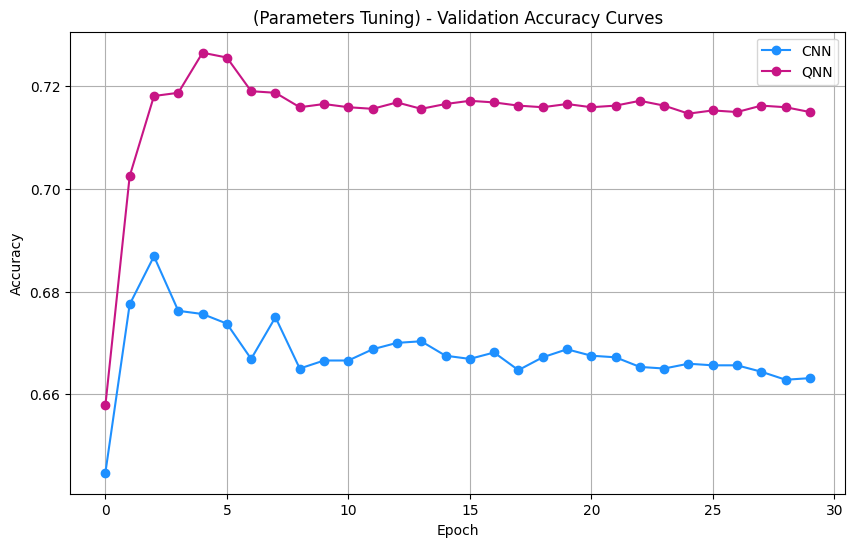

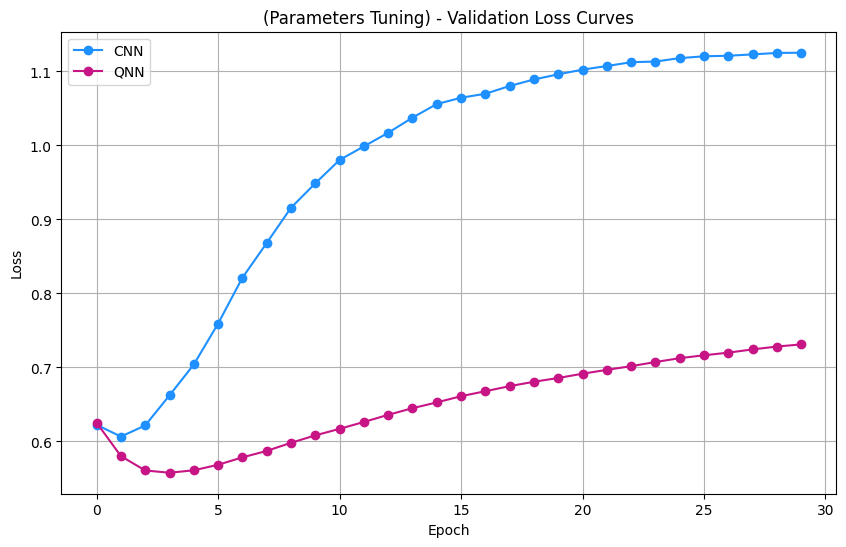

In [ ]:
plot_accuracy_curves([avg_accuracy_curve, q_avg_accuracy_curve], title='(Parameters Tuning)')
plot_loss_curves([avg_valid_loss_curve, q_avg_valid_loss_curve], title='(Parameters Tuning)')

# Quantum Transfer Learning

## Load, Normalize and Display Dataset

In [ ]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

def read_h5_images(h5_file):
    image_arrays = []
    with h5py.File(h5_file, 'r') as hf:
        keys = list(hf.keys())
        num_images = min(200, len(keys))

        for i in range(num_images):
            image_data = hf[keys[i]][()]
            image_arrays.append(image_data)

    return image_arrays

def display_images(image_arrays , number):
    num_images = len(image_arrays)
    num_rows = int(np.ceil(num_images / 10))
    fig, axes = plt.subplots(num_rows, 10, figsize=(15, num_rows * 1.5))



    for i in range(num_images):
        if num_rows > 1:
            ax = axes[i // 10, i % 10]
        else:
            ax = axes[i % 10]
        fig_1, ax_1 = plt.subplots(figsize=(image_arrays[i].shape[1]/100, image_arrays[i].shape[0]/100))
        ax_1.imshow(image_arrays[i], cmap='gray')
        ax_1.axis('off')

        if ( i < 160 ):
          plt.savefig("quanvolution_images/train/"+str(number)+"/"+str(i)+".jpg")
        else:
          plt.savefig("quanvolution_images/val/"+str(number)+"/"+str(i)+".jpg")


        ax.imshow(image_arrays[i], cmap='gray')
        ax.axis('off')

syndrome_images = read_h5_images('syndrome_data_200_32.h5')
non_syndrome_images = read_h5_images('non_syndrome_data_200_32.h5')

syndrome_images = np.array(syndrome_images) / 255
non_syndrome_images = np.array(non_syndrome_images) / 255

syndrome_labels = np.ones(len(syndrome_images))
non_syndrome_labels = np.zeros(len(non_syndrome_images))

print('Syndrome Images')
display_images(syndrome_images , 0 )
print('Non Syndrome Images')
display_images(non_syndrome_images , 1 )

In [ ]:
!rm -r quanvolution_images/val/.ipynb_checkpoints/

## Load Libraries

In [ ]:
# Some parts of this code are based on the Python script:
# https://github.com/pytorch/tutorials/blob/master/beginner_source/transfer_learning_tutorial.py

import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time
import os
import copy
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, transforms
import pennylane as qml
from pennylane import numpy as np
torch.manual_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt


## Set Quantum Transfer Learning Hyperparameters

In [ ]:
n_qubits = 4                # Number of qubits
step = 0.0004               # Learning rate
batch_size = 4              # Number of samples for each training step
num_epochs = 8             # Number of training epochs
q_depth = 6                 # Depth of the quantum circuit (number of variational layers)
gamma_lr_scheduler = 0.1    # Learning rate reduction applied every 10 epochs.
q_delta = 0.01              # Initial spread of random quantum weights
start_time = time.time()    # Start of the computation timer

In [ ]:
dev = qml.device("default.qubit", wires=n_qubits)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Define Preprocessing Pipeline

In [ ]:
data_transforms = {
    "train": transforms.Compose(
        [
            # transforms.RandomResizedCrop(224),     # uncomment for data augmentation
            # transforms.RandomHorizontalFlip(),     # uncomment for data augmentation
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            # Normalize input channels using mean values and standard deviations of ImageNet.
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

data_dir = "quanvolution_images"
image_datasets = {
    x if x == "train" else "validation": datasets.ImageFolder(
        os.path.join(data_dir, x), data_transforms[x]
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "validation"]}
class_names = image_datasets["train"].classes

# Initialize dataloader
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True)
    for x in ["train", "validation"]
}


# function to plot images
def imshow(inp, title=None):
    """Display image from tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    # Inverse of the initial normalization operation.
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

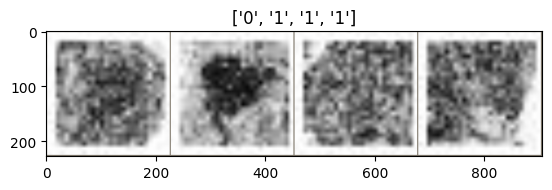

In [ ]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders["validation"]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True)
    for x in ["train", "validation"]
}

## Variational Quantum Circuit

In [ ]:
def H_layer(nqubits):
    for idx in range(nqubits):
        qml.Hadamard(wires=idx)

def RY_layer(w):
    for idx, element in enumerate(w):
        qml.RY(element, wires=idx)

def entangling_layer(nqubits):
    for i in range(0, nqubits - 1, 2):
        qml.CNOT(wires=[i, i + 1])
    for i in range(1, nqubits - 1, 2):
        qml.CNOT(wires=[i, i + 1])

In [ ]:
"""
  Variational quantum circuit.
"""
@qml.qnode(dev)
def quantum_net(q_input_features, q_weights_flat):


    q_weights = q_weights_flat.reshape(q_depth, n_qubits)

    H_layer(n_qubits)

    RY_layer(q_input_features)

    for k in range(q_depth):
        entangling_layer(n_qubits)
        RY_layer(q_weights[k])

    exp_vals = [qml.expval(qml.PauliZ(position)) for position in range(n_qubits)]
    return tuple(exp_vals)

## Dressed Quantum Neural Network

In [ ]:
class DressedQuantumNet(nn.Module):

    def __init__(self):

        super().__init__()
        self.pre_net = nn.Linear(512, n_qubits)
        self.q_params = nn.Parameter(q_delta * torch.randn(q_depth * n_qubits))
        self.post_net = nn.Linear(n_qubits, 2)

    def forward(self, input_features):
        # Reducing the feature dimension from 512 to 4
        pre_out = self.pre_net(input_features)
        q_in = torch.tanh(pre_out) * np.pi / 2.0

        q_out = torch.Tensor(0, n_qubits)
        q_out = q_out.to(device)
        for elem in q_in:
            q_out_elem = torch.hstack(quantum_net(elem, self.q_params)).float().unsqueeze(0)
            q_out = torch.cat((q_out, q_out_elem))

        return self.post_net(q_out)

## ResNet18 Transfer Learning Configuration

In [ ]:
weights = torchvision.models.ResNet18_Weights.IMAGENET1K_V1
model_hybrid = torchvision.models.resnet18(weights=weights)

for param in model_hybrid.parameters():
    param.requires_grad = False


model_hybrid.fc = DressedQuantumNet()

model_hybrid = model_hybrid.to(device)

## Training and Evaluation Loop

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
optimizer_hybrid = optim.Adam(model_hybrid.fc.parameters(), lr=step)

In [ ]:
exp_lr_scheduler = lr_scheduler.StepLR(
    optimizer_hybrid, step_size=10, gamma=gamma_lr_scheduler
)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs):

     # Lists to store evaluation metrics and loss curves for each split
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    all_train_avg_loss_curves = []
    all_valid_avg_loss_curves = []
    all_avg_accuracies_curves = []
    min_losses = []
    cms = []

    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_loss = 10000.0  # Large arbitrary number
    best_acc_train = 0.0
    best_loss_train = 10000.0  # Large arbitrary number
    print("Training started:")

    for epoch in range(num_epochs):

        # Each epoch has a training and validation phase
        for phase in ["train", "validation"]:
            if phase == "train":
                # Set model to training mode
                model.train()
            else:
                # Set model to evaluate mode
                model.eval()
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            n_batches = dataset_sizes[phase] // batch_size
            it = 0
            for inputs, labels in dataloaders[phase]:
                since_batch = time.time()
                batch_size_ = len(inputs)
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * batch_size_
                batch_corrects = torch.sum(preds == labels.data).item()
                running_corrects += batch_corrects
                print(
                    "Phase: {} Epoch: {}/{} Iter: {}/{} Batch time: {:.4f}".format(
                        phase,
                        epoch + 1,
                        num_epochs,
                        it + 1,
                        n_batches + 1,
                        time.time() - since_batch,
                    ),
                    end="\r",
                    flush=True,
                )
                it += 1

            # Print epoch results
            if ( phase == "train" ):
              epoch_loss = running_loss / dataset_sizes[phase]
              epoch_acc = running_corrects / dataset_sizes[phase]
              all_train_avg_loss_curves.append(epoch_loss)
            else:
              epoch_loss = running_loss / dataset_sizes[phase]
              epoch_acc = running_corrects / dataset_sizes[phase]
              all_valid_avg_loss_curves.append(epoch_loss)
              all_avg_accuracies_curves.append(epoch_acc)
            print(
                "Phase: {} Epoch: {}/{} Loss: {:.4f} Acc: {:.4f}        ".format(
                    "train" if phase == "train" else "validation  ",
                    epoch + 1,
                    num_epochs,
                    epoch_loss,
                    epoch_acc,
                )
            )

            # Check if this is the best model wrt previous epochs
            if phase == "validation" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == "validation" and epoch_loss < best_loss:
                best_loss = epoch_loss
            if phase == "train" and epoch_acc > best_acc_train:
                best_acc_train = epoch_acc
            if phase == "train" and epoch_loss < best_loss_train:
                best_loss_train = epoch_loss

            # Update learning rate
            if phase == "train":
                scheduler.step()

    # Print final results
    model.load_state_dict(best_model_wts)
    time_elapsed = time.time() - since
    print(
        "Training completed in {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60)
    )
    print("Best test loss: {:.4f} | Best test accuracy: {:.4f}".format(best_loss, best_acc))
    return  all_train_avg_loss_curves ,all_valid_avg_loss_curves , all_avg_accuracies_curves

## Plotting Functions

In [ ]:
def plot_multiple_splits_loss_curve(avg_train_loss_curve, avg_valid_loss_curve, title):

    # Set up the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot loss curves for each model
    plt.plot(avg_train_loss_curve, label='Average Training Loss', marker='o', color='mediumblue', linestyle='-')
    plt.plot(avg_valid_loss_curve, label='Average Validation Loss', marker='o', color='crimson', linestyle='-')

    # Set labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss')
    plt.title(f'{title} - Validation Loss Curves')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

def plot_multiple_splits_accuracy_curve(avg_accuracy_curve, title):

    # Set up the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot loss curves for each model
    plt.plot(avg_accuracy_curve, label='Average Validation Accuracy', marker='o', color='mediumturquoise', linestyle='-')

    # Set labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Average Accuracy')
    plt.title(f'{title} - Validation Accuracy Curve')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

In [ ]:
all_train_avg_loss_curves ,all_valid_avg_loss_curves , all_avg_accuracies_curves = model_hybrid = train_model(
    model_hybrid, criterion, optimizer_hybrid, exp_lr_scheduler, num_epochs=num_epochs
)

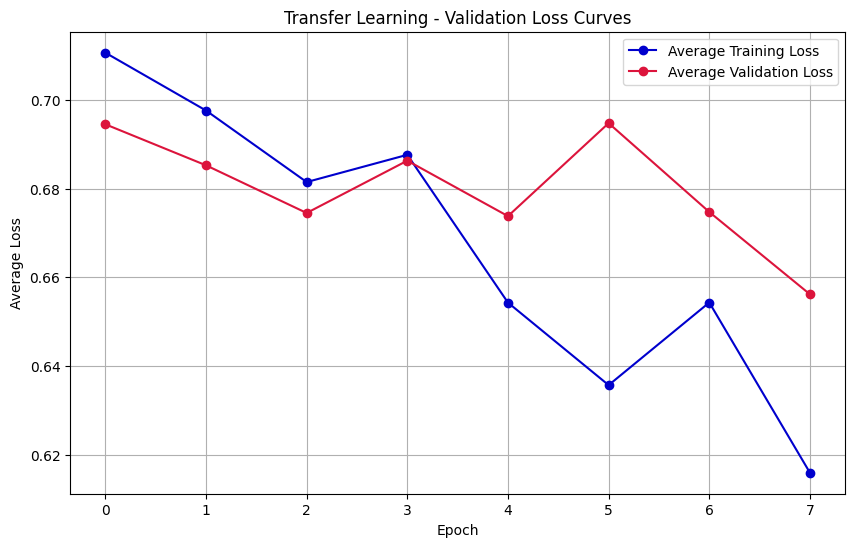

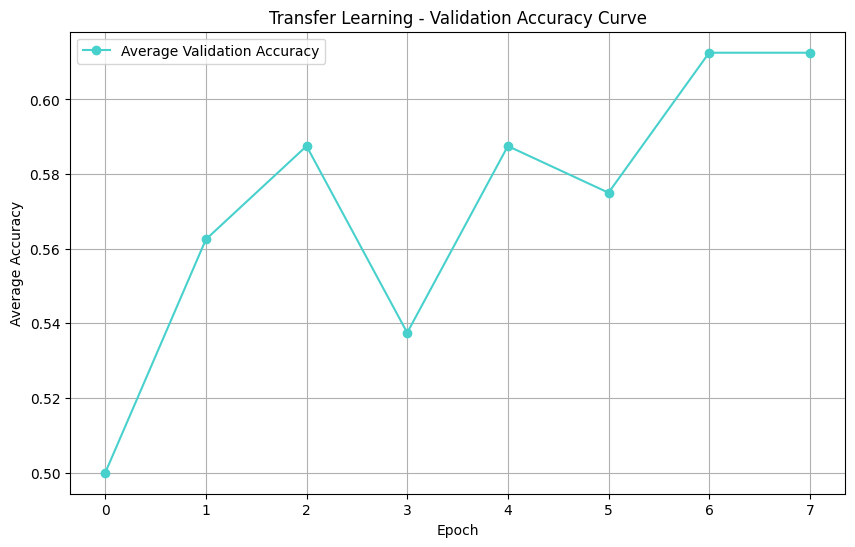

In [ ]:
plot_multiple_splits_loss_curve(all_train_avg_loss_curves, all_valid_avg_loss_curves, title='Transfer Learning')

plot_multiple_splits_accuracy_curve(all_avg_accuracies_curves, title='Transfer Learning')